# **Extensive Shopee Store Data Analytics (My Personal Store)**

<a href="https://www.flaticon.com/free-icons/metric" title="metric icons">Metric icons created by Design Circle - Flaticon</a>

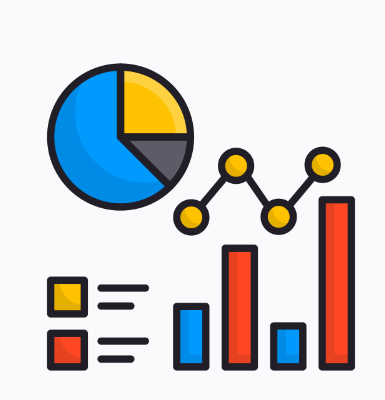



***This will be a Data Analytics project analyzing my personal e-commerce shop in Shopee. My family sells handmade soaps and honey. I want to know the key insights that I can get with the metrics that I can obtain in the Shopee Seller Center.***

#### My objective for this analysis is to try to understand what is happening to the shop and get insights from the data to make decisions if there are anything to adjust for the user experience, if I should start doing makrketing again for the products (Shop discounts during Platform Sale Dates and starting Marketing in other Social Media Platforms), and the overall direction of the branding of the product.

I will be tackling the completed orders of the shop for the bulk of the analysis here. I will be answering the questions like -
> Are promotions and Shopee Platform sales effective for increasing my soap sales?',

> How much was the total sales of the Shop until the period where I obtained the data?'

> What are the top provinces and cities that buys from our shop?

> How much are the sales for those top Provinces?

> What customer behavior can I glean from the metrics seen in the seller dashboard?

> How important is the price of the soap to the demand of the soaps?





I have done a previous work on my store but it was not extensive. I also tried to do a Machine Learning Forecasting model on the data previously but was not that successful since my data was not that extensive. I will be considering in the end if I am to do some forecasting with my data in the future. But as of now, I will focus on getting key insights from my data starting on 2020 up to October 26, 2023.

Since the Dashboard in Shopee is limited only to a monthly view, I will try to answer a lot of the questions and get as much insights I could get with the data that I have gathered here in this project which will be since I started using Shopee during 2020 so that I can get a larger picture on what happened during the past few years.

I will be doing this project here using Google Colab notebook and also will try to replicate my analysis on Excel and hopefully if possible (that I won't spend money), in PowerBI later on.

You can visit my store [here](https://shopee.ph/jeromeysraele):


### Enjoy the journey!

## First I will be importing the libraries that I will need to start with this project.
---
The data that I can get in Shopee are separated by month so I will have to aggregate a lot of data and will consider what datas should I join together and which ones will I do a separate analysis for it. And I finished the downloading of the data when I learned that there is a website for Shopee for developers so I could have just scraped the data from the site.

##😅

I will also be importing other libraries later on when I need them. But for now, only the essential ones first.

---
For this analysis I will try to at least give an overview of what the python code will do so that it's easier to understand.

In [123]:
import os #for working with folders.
import pandas as pd #for loading and working with the data itself.
import matplotlib.pyplot as plt #for graphing and visualizations, but mostly used for adjusting the visualizations.
import numpy as np #for advanced mathematical and statistical analysis.
import seaborn as sns #for Visualizations.
import warnings #to catch warnings that are way too long and not display them.

pd.set_option('display.max_rows', 150) #so I can display a max of 150 rows if I want to. Not necessarily needed.
pd.set_option('display.max_columns', None) #to display all the columns in the dataset.
print('Initialization Successful')

Initialization Successful


## **Aggregating Data**
I will now get all the data from my Google Drive, make a ***for loop*** to loop through all the excel files and combine them into a python DataFrame (*a 2 dimensional data structure, like a 2 dimensional array, or in simple terms a table with rows and columns that is used for Data Analysis in Python*) so that I can work with the data using the Python coding language. I will not be sharing the dataset for this project as it is my personal shop data and want it to be private for such reasons.

In [124]:
# I will do the orders first (Completed and All Orders)
# I will do Completed Orders first

#This code will get the excel files in my Google Drive and save the excel file objects in a list.
folder_path_completed = '/content/drive/MyDrive/Shoppee Data/Dataset/Completed Orders 06-2020-09-2023'
excel_file = [file for file in os.listdir(folder_path_completed) if file.endswith('.xlsx')]
#This code will loop through the 'excel_file' list and convert the excel files into a dataframe and put it into another list named 'dataframes_completed.
# I also added a code to catch the warnings given because it's way too long.
dataframes_completed = []
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_file:
      file_path = os.path.join(folder_path_completed, file)
      df = pd.read_excel(file_path)
      dataframes_completed.append(df)


# Now since all the DataFrames have been added in the 'dataframes_completed' list, this code will concatenate all the DataFrames into one.
df_completed_orders = pd.concat(dataframes_completed, ignore_index=True)
#For the sake of Data Privacy, I will drop the personal data from the dataset
df_completed_orders.drop(columns = ['Username (Buyer)',	'Receiver Name',	'Phone Number',	'Delivery Address'], inplace=True)
df_completed_orders.head()

Order ID Order Status Return / Refund Status  Tracking Number*  \
0  200620A7RESEFK    Completed                    NaN      780406537692   
1  200620A7RESEFK    Completed                    NaN      780406537692   
2  200620AA5CP9P7    Completed                    NaN      780406650623   
3  200620AD286HD3    Completed                    NaN      780408841064   
4  200623HX8Y1A6F    Completed                    NaN      780419893117   

  Shipping Option Shipment Method Estimated Ship Out Date         Ship Time  \
0     J&T Express          pickup        2020-07-01 19:32  2020-06-23 18:57   
1     J&T Express          pickup        2020-07-01 19:32  2020-06-23 18:57   
2     J&T Express          pickup        2020-07-01 20:15  2020-06-23 18:59   
3     J&T Express          pickup        2020-07-01 21:07  2020-06-23 18:58   
4     J&T Express          pickup        2020-07-04 14:02  2020-06-26 19:14   

  Order Creation Date   Order Paid Time  Parent SKU Reference No.  \
0    2020-06-20 19:32  2020-06-20 19:32                       NaN   
1    2020-06-20 19:32  2020-06-20 19:32                       NaN   
2    2020-06-20 20:15  2020-06-20 20:15                       NaN   
3    2020-06-20 21:07  2020-06-20 21:07                       NaN   
4    2020-06-23 21:03  2020-06-25 14:02                       NaN   

                          Product Name  SKU Reference No. Variation Name  \
0  Bayabas (Mild Antiseptic Bath Soap)                NaN            NaN   
1      Acapulco (Antifungal Bath Soap)                NaN            NaN   
2      Acapulco (Antifungal Bath Soap)                NaN            NaN   
3  Bayabas (Mild Antiseptic Bath Soap)                NaN            NaN   
4   Citronella Antibacterial Bath Soap                NaN            NaN   

   Original Price  Deal Price  Quantity  Product Subtotal  \
0               0          35        15               525   
1               0          35        20               700   
2               0          35        40              1400   
3               0          35        40              1400   
4               0          35       100              3500   

   Total Discount(PHP)  Price Discount(from Seller)(PHP)  Shopee Rebate(PHP)  \
0                 -525                              -525                   0   
1                 -700                              -700                   0   
2                -1400                             -1400                   0   
3                -1400                             -1400                   0   
4                -3500                             -3500                   0   

   SKU Total Weight  Number of Items in Order  Order Total Weight  \
0               2.1                        35                 4.9   
1               2.8                        35                 4.9   
2               5.6                        40                 5.6   
3               5.6                        40                 5.6   
4              14.0                       100                14.0   

   Seller Voucher(PHP)  Seller Absorbed Coin Cashback  Shopee Voucher(PHP)  \
0                    0                              0                  200   
1                    0                              0                  200   
2                    0                              0                  200   
3                    0                              0                  200   
4                    0                              0                    0   

  Bundle Deals Indicator(Y/N)  Shopee Bundle Discount(PHP)  \
0                           N                            0   
1                           N                            0   
2                           N                            0   
3                           N                            0   
4                           N                            0   

   Seller Bundle Discount(PHP)  Shopee Coins Offset(PHP)  \
0                            0                

In [125]:
#This is the same process as above just for 'All Orders' data.

folder_path_all = '/content/drive/MyDrive/Shoppee Data/Dataset/All Orders 06-2020-09-2023'
excel_file = [file for file in os.listdir(folder_path_all) if file.endswith('.xlsx')]
dataframes_all = []
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_file:
        file_path = os.path.join(folder_path_all, file)
        df = pd.read_excel(file_path)
        dataframes_all.append(df)

df_all_orders = pd.concat(dataframes_all, ignore_index=True)
df_all_orders.drop(columns = ['Username (Buyer)',	'Receiver Name',	'Phone Number',	'Delivery Address'], inplace=True)
df_all_orders.head()

Order ID Order Status Cancel reason Return / Refund Status  \
0  230802HKE2P86A    Completed           NaN                    NaN   
1  230802JDW33VKV    Completed           NaN                    NaN   
2  230802K0Q3B7D7    Completed           NaN                    NaN   
3  230802KNREKF17    Completed           NaN                    NaN   
4  230802KS0CYVXS    Completed           NaN                    NaN   

   Tracking Number*             Shipping Option Shipment Method  \
0      7.868695e+11  Standard Local-J&T Express          pickup   
1      7.868695e+11  Standard Local-J&T Express          pickup   
2      7.868695e+11  Standard Local-J&T Express          pickup   
3      7.868695e+11  Standard Local-J&T Express          pickup   
4      7.868695e+11  Standard Local-J&T Express          pickup   

  Estimated Ship Out Date         Ship Time Order Creation Date  \
0        2023-08-10 00:13  2023-08-03 11:08    2023-08-02 00:03   
1        2023-08-10 08:06  2023-08-03 11:08    2023-08-02 07:56   
2        2023-08-10 13:43  2023-08-03 11:08    2023-08-02 13:33   
3        2023-08-10 20:00  2023-08-03 11:08    2023-08-02 19:50   
4        2023-08-10 20:50  2023-08-03 11:08    2023-08-02 20:48   

    Order Paid Time  Parent SKU Reference No.  \
0  2023-08-02 00:13                       NaN   
1  2023-08-02 08:06                       NaN   
2  2023-08-02 13:43                       NaN   
3  2023-08-02 20:00                       NaN   
4  2023-08-02 20:50                       NaN   

                         Product Name  SKU Reference No. Variation Name  \
0     Acapulco (Antifungal Bath Soap)                NaN            NaN   
1     Acapulco (Antifungal Bath Soap)                NaN            NaN   
2     Acapulco (Antifungal Bath Soap)                NaN            NaN   
3     Acapulco (Antifungal Bath Soap)                NaN            NaN   
4  Citronella Antibacterial Bath Soap                NaN            NaN   

   Original Price  Deal Price  Quantity  Product Subtotal  \
0              60          60         2               120   
1              60          60         1                60   
2              60          60         1                60   
3              60          60         2               120   
4              60          60         2               120   

   Total Discount(PHP)  Price Discount(from Seller)(PHP)  Shopee Rebate(PHP)  \
0                    0                                 0                   0   
1                    0                                 0                   0   
2                    0                                 0                   0   
3                    0                                 0                   0   
4                    0                                 0                   0   

   SKU Total Weight  Number of Items in Order  Order Total Weight  \
0              0.36                         2                0.36   
1              0.18                         1                0.18   
2              0.18                         1                0.18   
3              0.36                         2                0.36   
4              0.36                         2                0.36   

   Seller Voucher(PHP)  Seller Absorbed Coin Cashback  Shopee Voucher(PHP)  \
0                    0                              0                    0   
1                    0                              0                    0   
2                    0                              0                    0   
3                    0                              0                    0   
4                    0                              0                    0   

  Bundle Deals Indicator(Y/N)  Shopee Bundle Discount(PHP)  \
0                           N                            0   
1                           N                            0   
2                           N                            0   
3                           N                     

In [126]:
# Save both files for future use.

output_path = '/content/drive/MyDrive/Shoppee Data/'

df_all_orders.to_excel((output_path + 'all orders combined.xlsx'), index = False)
df_completed_orders.to_excel((output_path + 'completed orders combined.xlsx'), index = False)

***Now I have combined the datas for both All Orders and Completed Orders on my shop and saved them in my Google Drive so that I can do an analysis for them using Excel later. I do have a lot of data still to process here for analysis. I will also think about how to combine all those data into just one dataset so I will move on to it. I will use the process done above to load each metrics and concatenate them in to one DataFrame.***

---

#### *Now I will go on with the metrics.*

In [127]:
#Discount Overview Dataset
#Same Process as above
folder_path_discount = '/content/drive/MyDrive/Shoppee Data/Dataset/Discount Overview'
excel_file = [file for file in os.listdir(folder_path_discount) if file.endswith('.xlsx')]
dataframes_discount = []
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_file:
        file_path = os.path.join(folder_path_discount, file)
        df = pd.read_excel(file_path, sheet_name= 1)
        dataframes_discount.append(df)

df_discount = pd.concat(dataframes_discount, ignore_index=True)
df_discount.head()

Date Sales (Placed Order) (PHP) Sales (Confirmed Order) (PHP)  \
0  01/10/2021                        291                           291   
1  02/10/2021                        808                           808   
2  03/10/2021                        265                           265   
3  04/10/2021                        439                           439   
4  05/10/2021                        411                           411   

   Orders (Placed Order)  Orders (Confirmed Order)  Units Sold (Placed Order)  \
0                      2                         2                          4   
1                      3                         3                         12   
2                      1                         1                          5   
3                      2                         2                          7   
4                      2                         2                          6   

   Units Sold (Confirmed Order)  Buyers (Placed Order)  \
0                             4                      2   
1                            12                      3   
2                             5                      1   
3                             7                      2   
4                             6                      2   

   Buyers (Confirmed Order) Sales Per Buyer (Placed Order) (PHP)  \
0                         2                               145.50   
1                         3                               269.33   
2                         1                               265.00   
3                         2                               219.50   
4                         2                               205.50   

  Sales Per Buyer (Confirmed Order) (PHP)  
0                                  145.50  
1                                  269.33  
2                                  265.00  
3                                  219.50  
4                                  205.50

In [128]:
# For Product Overview
folder_path = '/content/drive/MyDrive/Shoppee Data/Dataset/Product Overview'
excel_file = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = []
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_file:
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        dataframes.append(df)

df_prod_overview = pd.concat(dataframes, ignore_index=True)
df_prod_overview.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0  01/10/2021                        40                  96              6   
1  02/10/2021                        21                  50              6   
2  03/10/2021                        40                 131              8   
3  04/10/2021                        24                  65              7   
4  05/10/2021                        42                 127              8   

   Product Bounce Visitors Product Bounce Rate  Search Clicks  Likes  \
0                       21              52.50%              0      0   
1                        8              38.10%              0      0   
2                       18              45.00%              0      0   
3                       10              41.67%              0      1   
4                       20              47.62%              0      1   

   Product Visitors (Add to Cart)  Units (Add to Cart)  \
0                              10                   22   
1                               5                   16   
2                              11                   29   
3                               8                   21   
4                               5                   17   

  Conversion Rate (Add to Cart)  Buyers (Placed Order)  Units (Placed Order)  \
0                        25.00%                      2                     4   
1                        23.81%                      3                    12   
2                        27.50%                      1                     5   
3                        33.33%                      2                     7   
4                        11.90%                      2                     6   

   Items Placed Sales (Placed Order) (PHP) Conversion Rate (Placed Order)  \
0             0                        291                          5.00%   
1             0                        808                         14.29%   
2             0                        265                          2.50%   
3             0                        439                          8.33%   
4             0                        411                          4.76%   

   Buyers (Confirmed Order)  Units (Confirmed Order)  Items Confirmed  \
0                         2                        4                1   
1                         3                       12                2   
2                         1                        5                1   
3                         2                        7                1   
4                         2                        6                4   

  Sales (Confirmed Order) (PHP) Conversion Rate (Confirmed Order)  \
0                           291                             5.00%   
1                           808                            14.29%   
2                           265                             2.50%   
3                           439                             8.33%   
4                           411                             4.76%   

  Conversion Rate (Placed to Confirmed)  
0                               100.00%  
1                               100.00%  
2                               100.00%  
3                               100.00%  
4                               100.00%

In [129]:
#Sales Overview
file_path = '/content/drive/MyDrive/Shoppee Data/Dataset/Sales Overview'
excel_files = [file for file in os.listdir(file_path) if file.endswith('.xlsx')]

dataframe = []

with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_files:
      excel = os.path.join(file_path,file)
      data = pd.read_excel(excel, skiprows=3)
      dataframe.append(data)

df_sales = pd.concat(dataframe, ignore_index=True)
df_sales.head()

Date  Visitors (Visit)  Buyers (Placed Orders)  \
0  01/10/2021                41                       2   
1  02/10/2021                22                       3   
2  03/10/2021                40                       1   
3  04/10/2021                26                       2   
4  05/10/2021                42                       2   

   Units (Placed Orders)  Orders (Placed Orders) Sales (Placed Orders) (PHP)  \
0                      4                       2                         291   
1                     12                       3                         808   
2                      5                       1                         265   
3                      7                       2                         439   
4                      6                       2                         411   

  Conversion Rate (Visit to Placed)  Buyers (Confirmed Orders)  \
0                             4.88%                          2   
1                            13.64%                          3   
2                             2.50%                          1   
3                             7.69%                          2   
4                             4.76%                          2   

   Units(Confirmed Orders)  Orders (Confirmed Orders)  \
0                        4                          2   
1                       12                          3   
2                        5                          1   
3                        7                          2   
4                        6                          2   

  Sales(Confirmed Orders) (PHP) Sales per Buyer (Confirmed Orders) (PHP)  \
0                           291                                   145.50   
1                           808                                   269.33   
2                           265                                   265.00   
3                           439                                   219.50   
4                           411                                   205.50   

  Conversion Rate Conversion Rate (Placed to Confirmed)  
0           4.88%                               100.00%  
1          13.64%                               100.00%  
2           2.50%                               100.00%  
3           7.69%                               100.00%  
4           4.76%                               100.00%

### *Now I have combined the datas for all three metrics, I will now check the columns on each dataset and see which ones are redundant and need to be dropped and also check if a same column is important for assessing a different metric.*

 > **For example:** The orders and sales in the discount data only reflect those that happened when there was a marketing campaign done  by me in the Shopee App.

Looking at the data, I saw that the columns  ***Buyers (Placed Orders),	Units (Placed Orders),	Orders (Placed Orders),	Sales (Placed Orders) (PHP), Buyers (Confirmed Orders),	Units(Confirmed Orders),	Orders (Confirmed Orders), and	Sales(Confirmed Orders)*** are redundant for the Visit Overview dataset and the Sale Overview dataset. So I will have to remove those categories from one of the datasets. Also, I will have to modify the names of the Visit and Conversion rates of the datasets so that it is more intuitive and easy to understand.

In [130]:
#listing the columns that I will drop from the DataFrame.
columns_to_drop = ['Buyers (Placed Orders)',
                   'Units (Placed Orders)',	'Orders (Placed Orders)',
                   'Sales (Placed Orders) (PHP)',	'Buyers (Confirmed Orders)',
                   'Units(Confirmed Orders)', 'Orders (Confirmed Orders)',	'Sales(Confirmed Orders) (PHP)']
#Dropping the said columns.
df_sales.drop(columns_to_drop, axis=1, inplace= True)


#Renaming the columns of the DataFrames that need renaming
df_sales.rename(columns={'Visitors (Visit)': 'Visitors (Site Visit)','Conversion Rate (Visit to Placed)' : 'Conversion Rate (Site Visit to Placed)',
                         'Conversion Rate': 'Conversion Rate (Site Visit to Confirmed)'}, inplace=True)

df_prod_overview.rename(columns={'Conversion Rate (Placed Order)' : 'Conversion Rate (Product Visit to Placed)',
                         'Conversion Rate (Confirmed Order)': 'Conversion Rate (Product Visit to Confirmed)'}, inplace=True)

df_sales.head()

Date  Visitors (Site Visit) Conversion Rate (Site Visit to Placed)  \
0  01/10/2021                     41                                  4.88%   
1  02/10/2021                     22                                 13.64%   
2  03/10/2021                     40                                  2.50%   
3  04/10/2021                     26                                  7.69%   
4  05/10/2021                     42                                  4.76%   

  Sales per Buyer (Confirmed Orders) (PHP)  \
0                                   145.50   
1                                   269.33   
2                                   265.00   
3                                   219.50   
4                                   205.50   

  Conversion Rate (Site Visit to Confirmed)  \
0                                     4.88%   
1                                    13.64%   
2                                     2.50%   
3                                     7.69%   
4                                     4.76%   

  Conversion Rate (Placed to Confirmed)  
0                               100.00%  
1                               100.00%  
2                               100.00%  
3                               100.00%  
4                               100.00%

In [131]:
#Showing the first five rows of Product Overview.
df_prod_overview.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0  01/10/2021                        40                  96              6   
1  02/10/2021                        21                  50              6   
2  03/10/2021                        40                 131              8   
3  04/10/2021                        24                  65              7   
4  05/10/2021                        42                 127              8   

   Product Bounce Visitors Product Bounce Rate  Search Clicks  Likes  \
0                       21              52.50%              0      0   
1                        8              38.10%              0      0   
2                       18              45.00%              0      0   
3                       10              41.67%              0      1   
4                       20              47.62%              0      1   

   Product Visitors (Add to Cart)  Units (Add to Cart)  \
0                              10                   22   
1                               5                   16   
2                              11                   29   
3                               8                   21   
4                               5                   17   

  Conversion Rate (Add to Cart)  Buyers (Placed Order)  Units (Placed Order)  \
0                        25.00%                      2                     4   
1                        23.81%                      3                    12   
2                        27.50%                      1                     5   
3                        33.33%                      2                     7   
4                        11.90%                      2                     6   

   Items Placed Sales (Placed Order) (PHP)  \
0             0                        291   
1             0                        808   
2             0                        265   
3             0                        439   
4             0                        411   

  Conversion Rate (Product Visit to Placed)  Buyers (Confirmed Order)  \
0                                     5.00%                         2   
1                                    14.29%                         3   
2                                     2.50%                         1   
3                                     8.33%                         2   
4                                     4.76%                         2   

   Units (Confirmed Order)  Items Confirmed Sales (Confirmed Order) (PHP)  \
0                        4                1                           291   
1                       12                2                           808   
2                        5                1                           265   
3                        7                1                           439   
4                        6                4                           411   

  Conversion Rate (Product Visit to Confirmed)  \
0                                        5.00%   
1                                       14.29%   
2                                        2.50%   
3                                        8.33%   
4                                        4.76%   

  Conversion Rate (Placed to Confirmed)  
0                               100.00%  
1                               100.00%  
2                               100.00%  
3                               100.00%  
4                               100.00%

### It's time to combine the metrics datasets together.

I will now combine all the metrics into one DataFrame. I will combine all of them using a common column from all of them which is the Date column.

In [132]:
#Merge all fo the columns together using the 'Date' column to make one DataFrame for Sales and Product Overview.
df_sales_prod = pd.merge(df_prod_overview, df_sales, on='Date')
df_sales_prod.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0  01/10/2021                        40                  96              6   
1  02/10/2021                        21                  50              6   
2  03/10/2021                        40                 131              8   
3  04/10/2021                        24                  65              7   
4  05/10/2021                        42                 127              8   

   Product Bounce Visitors Product Bounce Rate  Search Clicks  Likes  \
0                       21              52.50%              0      0   
1                        8              38.10%              0      0   
2                       18              45.00%              0      0   
3                       10              41.67%              0      1   
4                       20              47.62%              0      1   

   Product Visitors (Add to Cart)  Units (Add to Cart)  \
0                              10                   22   
1                               5                   16   
2                              11                   29   
3                               8                   21   
4                               5                   17   

  Conversion Rate (Add to Cart)  Buyers (Placed Order)  Units (Placed Order)  \
0                        25.00%                      2                     4   
1                        23.81%                      3                    12   
2                        27.50%                      1                     5   
3                        33.33%                      2                     7   
4                        11.90%                      2                     6   

   Items Placed Sales (Placed Order) (PHP)  \
0             0                        291   
1             0                        808   
2             0                        265   
3             0                        439   
4             0                        411   

  Conversion Rate (Product Visit to Placed)  Buyers (Confirmed Order)  \
0                                     5.00%                         2   
1                                    14.29%                         3   
2                                     2.50%                         1   
3                                     8.33%                         2   
4                                     4.76%                         2   

   Units (Confirmed Order)  Items Confirmed Sales (Confirmed Order) (PHP)  \
0                        4                1                           291   
1                       12                2                           808   
2                        5                1                           265   
3                        7                1                           439   
4                        6                4                           411   

  Conversion Rate (Product Visit to Confirmed)  \
0                                        5.00%   
1                                       14.29%   
2                                        2.50%   
3                                        8.33%   
4                                        4.76%   

  Conversion Rate (Placed to Confirmed)_x  Visitors (Site Visit)  \
0                                 100.00%                     41   
1                                 100.00%                     22   
2                                 100.00%                     40   
3                                 100.00%                     26   
4                                 100.00%                     42   

  Conversion Rate (Site Visit to Placed)  \
0                                  4.88%   
1                                 13.64%   
2                                  2.50%   
3                                  7.69%   
4                                  4.76%   

  Sales per Buyer (Confirmed Orders) (PHP)  \
0                                   145.50   
1                              

In [133]:
#Merging the Marketing Metrics data with the Sales and Product Overview on the 'Date' column while adding a suffix
#'_from marketing' for the similar columns that come from marketing.
df_metrics_merged = pd.merge(df_sales_prod, df_discount, on='Date', suffixes=('', '_from marketing'))
df_metrics_merged.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0  01/10/2021                        40                  96              6   
1  02/10/2021                        21                  50              6   
2  03/10/2021                        40                 131              8   
3  04/10/2021                        24                  65              7   
4  05/10/2021                        42                 127              8   

   Product Bounce Visitors Product Bounce Rate  Search Clicks  Likes  \
0                       21              52.50%              0      0   
1                        8              38.10%              0      0   
2                       18              45.00%              0      0   
3                       10              41.67%              0      1   
4                       20              47.62%              0      1   

   Product Visitors (Add to Cart)  Units (Add to Cart)  \
0                              10                   22   
1                               5                   16   
2                              11                   29   
3                               8                   21   
4                               5                   17   

  Conversion Rate (Add to Cart)  Buyers (Placed Order)  Units (Placed Order)  \
0                        25.00%                      2                     4   
1                        23.81%                      3                    12   
2                        27.50%                      1                     5   
3                        33.33%                      2                     7   
4                        11.90%                      2                     6   

   Items Placed Sales (Placed Order) (PHP)  \
0             0                        291   
1             0                        808   
2             0                        265   
3             0                        439   
4             0                        411   

  Conversion Rate (Product Visit to Placed)  Buyers (Confirmed Order)  \
0                                     5.00%                         2   
1                                    14.29%                         3   
2                                     2.50%                         1   
3                                     8.33%                         2   
4                                     4.76%                         2   

   Units (Confirmed Order)  Items Confirmed Sales (Confirmed Order) (PHP)  \
0                        4                1                           291   
1                       12                2                           808   
2                        5                1                           265   
3                        7                1                           439   
4                        6                4                           411   

  Conversion Rate (Product Visit to Confirmed)  \
0                                        5.00%   
1                                       14.29%   
2                                        2.50%   
3                                        8.33%   
4                                        4.76%   

  Conversion Rate (Placed to Confirmed)_x  Visitors (Site Visit)  \
0                                 100.00%                     41   
1                                 100.00%                     22   
2                                 100.00%                     40   
3                                 100.00%                     26   
4                                 100.00%                     42   

  Conversion Rate (Site Visit to Placed)  \
0                                  4.88%   
1                                 13.64%   
2                                  2.50%   
3                                  7.69%   
4                                  4.76%   

  Sales per Buyer (Confirmed Orders) (PHP)  \
0                                   145.50   
1                              

### Since I'm done with the 3 metrics, I will continue my work for the traffic data and merge it to the metrics after.

I will be repeating the processes all over again for the Traffic Overview Data. The data will be divided into 3 since there are PC users and APP users so I want to do visualizations later on on those.

In [134]:
# Traffic Overview Sheet 1

file_path = '/content/drive/MyDrive/Shoppee Data/Dataset/Traffic Overview'
excel_files = [file for file in os.listdir(file_path) if file.endswith('.xlsx')]

dataframe = []

with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_files:
      excel = os.path.join(file_path,file)
      data = pd.read_excel(excel, skiprows=3, sheet_name=0)
      dataframe.append(data)

df_traffic= pd.concat(dataframe, ignore_index=True)
df_traffic.head()

Date Page Views  Avg. Page Views Avg. Time Spent Bounce Rate  \
0  01/10/2021        124             3.02        00:01:31      48.78%   
1  02/10/2021         55             2.50        00:01:09      36.36%   
2  03/10/2021        159             3.98        00:01:27      45.00%   
3  04/10/2021         82             3.15        00:01:06      42.31%   
4  05/10/2021        177             4.21        00:01:28      40.48%   

  Visitors New Visitors  Existing Visitors  New Followers  
0       41           35                  6              3  
1       22           19                  3              0  
2       40           37                  3              2  
3       26           22                  4              3  
4       42           36                  6              3

In [135]:
# Traffic Overview Sheet PC Viewer
file_path = '/content/drive/MyDrive/Shoppee Data/Dataset/Traffic Overview'
excel_files = [file for file in os.listdir(file_path) if file.endswith('.xlsx')]

dataframe = []

with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_files:
      excel = os.path.join(file_path,file)
      data = pd.read_excel(excel, skiprows=3, sheet_name=1)
      dataframe.append(data)

df_traffic_PC = pd.concat(dataframe, ignore_index=True)
df_traffic_PC.head()

Date  Page Views  Avg. Page Views Avg. Time Spent Bounce Rate  \
0  01/10/2021          12             3.00        00:00:33      25.00%   
1  02/10/2021           2             1.00        00:00:20     100.00%   
2  03/10/2021          15             1.67        00:00:44      33.33%   
3  04/10/2021          11             2.75        00:01:13      75.00%   
4  05/10/2021           9             2.25        00:01:29      50.00%   

   Visitors  New Visitors  Existing Visitors New Followers  
0         4             3                  1             -  
1         2             2                  0             -  
2         9             9                  0             -  
3         4             3                  1             -  
4         4             4                  0             -

In [136]:
# Traffic Overview Sheet APP
file_path = '/content/drive/MyDrive/Shoppee Data/Dataset/Traffic Overview'
excel_files = [file for file in os.listdir(file_path) if file.endswith('.xlsx')]

dataframe = []

with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    for file in excel_files:
      excel = os.path.join(file_path,file)
      data = pd.read_excel(excel, skiprows=3, sheet_name=2)
      dataframe.append(data)

df_traffic_APP = pd.concat(dataframe, ignore_index=True)
df_traffic_APP.head()

Date Page Views  Avg. Page Views Avg. Time Spent Bounce Rate  \
0  01/10/2021        112             3.03        00:01:39      51.35%   
1  02/10/2021         53             2.65        00:01:13      30.00%   
2  03/10/2021        144             4.65        00:01:36      48.39%   
3  04/10/2021         71             3.23        00:01:05      36.36%   
4  05/10/2021        168             4.42        00:01:28      39.47%   

  Visitors New Visitors  Existing Visitors New Followers  
0       37           32                  5             -  
1       20           17                  3             -  
2       31           28                  3             -  
3       22           19                  3             -  
4       38           32                  6             -

### Now I'm going to merge all three datas into one DataFrame so that later on, it will be easier to compare and analyze them.

I will combine PC and APP first then the overall traffic data.

In [137]:
# Combining PC, and APP traffic data.

df_traffic_sub = pd.merge(df_traffic_PC, df_traffic_APP, on= 'Date', suffixes=('_PC', '_APP'))
df_traffic_sub.head()

Date  Page Views_PC  Avg. Page Views_PC Avg. Time Spent_PC  \
0  01/10/2021             12                3.00           00:00:33   
1  02/10/2021              2                1.00           00:00:20   
2  03/10/2021             15                1.67           00:00:44   
3  04/10/2021             11                2.75           00:01:13   
4  05/10/2021              9                2.25           00:01:29   

  Bounce Rate_PC  Visitors_PC  New Visitors_PC  Existing Visitors_PC  \
0         25.00%            4                3                     1   
1        100.00%            2                2                     0   
2         33.33%            9                9                     0   
3         75.00%            4                3                     1   
4         50.00%            4                4                     0   

  New Followers_PC Page Views_APP  Avg. Page Views_APP Avg. Time Spent_APP  \
0                -            112                 3.03            00:01:39   
1                -             53                 2.65            00:01:13   
2                -            144                 4.65            00:01:36   
3                -             71                 3.23            00:01:05   
4                -            168                 4.42            00:01:28   

  Bounce Rate_APP Visitors_APP New Visitors_APP  Existing Visitors_APP  \
0          51.35%           37               32                      5   
1          30.00%           20               17                      3   
2          48.39%           31               28                      3   
3          36.36%           22               19                      3   
4          39.47%           38               32                      6   

  New Followers_APP  
0                 -  
1                 -  
2                 -  
3                 -  
4                 -

In [138]:
#Combining the subcategory with the main traffic data.

df_traffic_combined = pd.merge(df_traffic, df_traffic_sub, on='Date')
df_traffic_combined.head()

Date Page Views  Avg. Page Views Avg. Time Spent Bounce Rate  \
0  01/10/2021        124             3.02        00:01:31      48.78%   
1  02/10/2021         55             2.50        00:01:09      36.36%   
2  03/10/2021        159             3.98        00:01:27      45.00%   
3  04/10/2021         82             3.15        00:01:06      42.31%   
4  05/10/2021        177             4.21        00:01:28      40.48%   

  Visitors New Visitors  Existing Visitors  New Followers  Page Views_PC  \
0       41           35                  6              3             12   
1       22           19                  3              0              2   
2       40           37                  3              2             15   
3       26           22                  4              3             11   
4       42           36                  6              3              9   

   Avg. Page Views_PC Avg. Time Spent_PC Bounce Rate_PC  Visitors_PC  \
0                3.00           00:00:33         25.00%            4   
1                1.00           00:00:20        100.00%            2   
2                1.67           00:00:44         33.33%            9   
3                2.75           00:01:13         75.00%            4   
4                2.25           00:01:29         50.00%            4   

   New Visitors_PC  Existing Visitors_PC New Followers_PC Page Views_APP  \
0                3                     1                -            112   
1                2                     0                -             53   
2                9                     0                -            144   
3                3                     1                -             71   
4                4                     0                -            168   

   Avg. Page Views_APP Avg. Time Spent_APP Bounce Rate_APP Visitors_APP  \
0                 3.03            00:01:39          51.35%           37   
1                 2.65            00:01:13          30.00%           20   
2                 4.65            00:01:36          48.39%           31   
3                 3.23            00:01:05          36.36%           22   
4                 4.42            00:01:28          39.47%           38   

  New Visitors_APP  Existing Visitors_APP New Followers_APP  
0               32                      5                 -  
1               17                      3                 -  
2               28                      3                 -  
3               19                      3                 -  
4               32                      6                 -

Good, after combining the traffic data, I will now combine the two to form just one dataset with all the metrics together to make it easier to analyze. The data will be combine on the 'Date' Column. Since there are no similar columns between the two DataFrames. I don't need to add suffixes.

In [139]:
df_metric_final = pd.merge(df_metrics_merged, df_traffic_combined, on='Date')
df_metric_final.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0  01/10/2021                        40                  96              6   
1  02/10/2021                        21                  50              6   
2  03/10/2021                        40                 131              8   
3  04/10/2021                        24                  65              7   
4  05/10/2021                        42                 127              8   

   Product Bounce Visitors Product Bounce Rate  Search Clicks  Likes  \
0                       21              52.50%              0      0   
1                        8              38.10%              0      0   
2                       18              45.00%              0      0   
3                       10              41.67%              0      1   
4                       20              47.62%              0      1   

   Product Visitors (Add to Cart)  Units (Add to Cart)  \
0                              10                   22   
1                               5                   16   
2                              11                   29   
3                               8                   21   
4                               5                   17   

  Conversion Rate (Add to Cart)  Buyers (Placed Order)  Units (Placed Order)  \
0                        25.00%                      2                     4   
1                        23.81%                      3                    12   
2                        27.50%                      1                     5   
3                        33.33%                      2                     7   
4                        11.90%                      2                     6   

   Items Placed Sales (Placed Order) (PHP)  \
0             0                        291   
1             0                        808   
2             0                        265   
3             0                        439   
4             0                        411   

  Conversion Rate (Product Visit to Placed)  Buyers (Confirmed Order)  \
0                                     5.00%                         2   
1                                    14.29%                         3   
2                                     2.50%                         1   
3                                     8.33%                         2   
4                                     4.76%                         2   

   Units (Confirmed Order)  Items Confirmed Sales (Confirmed Order) (PHP)  \
0                        4                1                           291   
1                       12                2                           808   
2                        5                1                           265   
3                        7                1                           439   
4                        6                4                           411   

  Conversion Rate (Product Visit to Confirmed)  \
0                                        5.00%   
1                                       14.29%   
2                                        2.50%   
3                                        8.33%   
4                                        4.76%   

  Conversion Rate (Placed to Confirmed)_x  Visitors (Site Visit)  \
0                                 100.00%                     41   
1                                 100.00%                     22   
2                                 100.00%                     40   
3                                 100.00%                     26   
4                                 100.00%                     42   

  Conversion Rate (Site Visit to Placed)  \
0                                  4.88%   
1                                 13.64%   
2                                  2.50%   
3                                  7.69%   
4                                  4.76%   

  Sales per Buyer (Confirmed Orders) (PHP)  \
0                                   145.50   
1                              

### Finally! I now have a comprehensive dataset for all the metrics that are captured by Shopee. I will now start my Data Analysis journey. But first, I will save the data in excel and csv format for my Data Analysis practice for excel.

In [140]:
df_metric_final.to_excel(output_path + 'Shopee Metrics.xlsx', index = False)

In [141]:
df_metric_final.to_csv(output_path + 'Shopee Metrics.csv', index = True)

# **Order Completed Sales Data Analysis**

Since I'm done aggregating all the data into the tables I wanted and saved them, I will start with my Analysis. I will now start with the Analysis of the Order Completed Sales Data.

Here I will do an analysis for the Customer Segmentation (Location) and Sales analysis for those locations. I will also do overall sales analysis for the completed orders and check for the seasonality and try to explain for some of the seasonality or trend of the sales using data. I will also check if the promotions from both the Platform and Shop Discounts have an effect on the sales of the store. I will also check the relationship of the price with the demand of the soaps and try to understand what I should do with it. I have done a separate analysis for the users of the soap although the demographics of the data is limited. I will not post it here due to data privacy reasons.


I'll load the dataset again.

In [142]:
df_completed_orders.head()

Order ID Order Status Return / Refund Status  Tracking Number*  \
0  200620A7RESEFK    Completed                    NaN      780406537692   
1  200620A7RESEFK    Completed                    NaN      780406537692   
2  200620AA5CP9P7    Completed                    NaN      780406650623   
3  200620AD286HD3    Completed                    NaN      780408841064   
4  200623HX8Y1A6F    Completed                    NaN      780419893117   

  Shipping Option Shipment Method Estimated Ship Out Date         Ship Time  \
0     J&T Express          pickup        2020-07-01 19:32  2020-06-23 18:57   
1     J&T Express          pickup        2020-07-01 19:32  2020-06-23 18:57   
2     J&T Express          pickup        2020-07-01 20:15  2020-06-23 18:59   
3     J&T Express          pickup        2020-07-01 21:07  2020-06-23 18:58   
4     J&T Express          pickup        2020-07-04 14:02  2020-06-26 19:14   

  Order Creation Date   Order Paid Time  Parent SKU Reference No.  \
0    2020-06-20 19:32  2020-06-20 19:32                       NaN   
1    2020-06-20 19:32  2020-06-20 19:32                       NaN   
2    2020-06-20 20:15  2020-06-20 20:15                       NaN   
3    2020-06-20 21:07  2020-06-20 21:07                       NaN   
4    2020-06-23 21:03  2020-06-25 14:02                       NaN   

                          Product Name  SKU Reference No. Variation Name  \
0  Bayabas (Mild Antiseptic Bath Soap)                NaN            NaN   
1      Acapulco (Antifungal Bath Soap)                NaN            NaN   
2      Acapulco (Antifungal Bath Soap)                NaN            NaN   
3  Bayabas (Mild Antiseptic Bath Soap)                NaN            NaN   
4   Citronella Antibacterial Bath Soap                NaN            NaN   

   Original Price  Deal Price  Quantity  Product Subtotal  \
0               0          35        15               525   
1               0          35        20               700   
2               0          35        40              1400   
3               0          35        40              1400   
4               0          35       100              3500   

   Total Discount(PHP)  Price Discount(from Seller)(PHP)  Shopee Rebate(PHP)  \
0                 -525                              -525                   0   
1                 -700                              -700                   0   
2                -1400                             -1400                   0   
3                -1400                             -1400                   0   
4                -3500                             -3500                   0   

   SKU Total Weight  Number of Items in Order  Order Total Weight  \
0               2.1                        35                 4.9   
1               2.8                        35                 4.9   
2               5.6                        40                 5.6   
3               5.6                        40                 5.6   
4              14.0                       100                14.0   

   Seller Voucher(PHP)  Seller Absorbed Coin Cashback  Shopee Voucher(PHP)  \
0                    0                              0                  200   
1                    0                              0                  200   
2                    0                              0                  200   
3                    0                              0                  200   
4                    0                              0                    0   

  Bundle Deals Indicator(Y/N)  Shopee Bundle Discount(PHP)  \
0                           N                            0   
1                           N                            0   
2                           N                            0   
3                           N                            0   
4                           N                            0   

   Seller Bundle Discount(PHP)  Shopee Coins Offset(PHP)  \
0                            0                

In [143]:
df_completed_orders.shape , len(df_completed_orders['Order ID'].unique())

((2961, 48), 2259)

Based on this metric, as of now, there are 2961 rows of data, 2259 separate orders and 1537 unique buyers (in a separate analysis for privacy reasons) of the soap from all the 2961 completed orders and counting here since our family started doing Shopee until now. Seeing this makes me happy because there are at least 1537 people that trust or ordered our products to used them.


---

## **Customer Segmentation**

Now since I have removed the Private Information in the data, I will just be focusing on the segmentation of the geographical locations of the customers that are ordering the products.


In [144]:
#Separating the top 50 Cities in terms of Orders Placed for visualization.
Cities = df_completed_orders['District'].value_counts().head(50)
Cities.head()

Quezon City       163
Pasig City         70
Taguig City        63
Paranaque City     56
Makati City        55
Name: District, dtype: int64

I have separated the top 50 cities per number of orders places and I will graph the data to visualize the distribution.

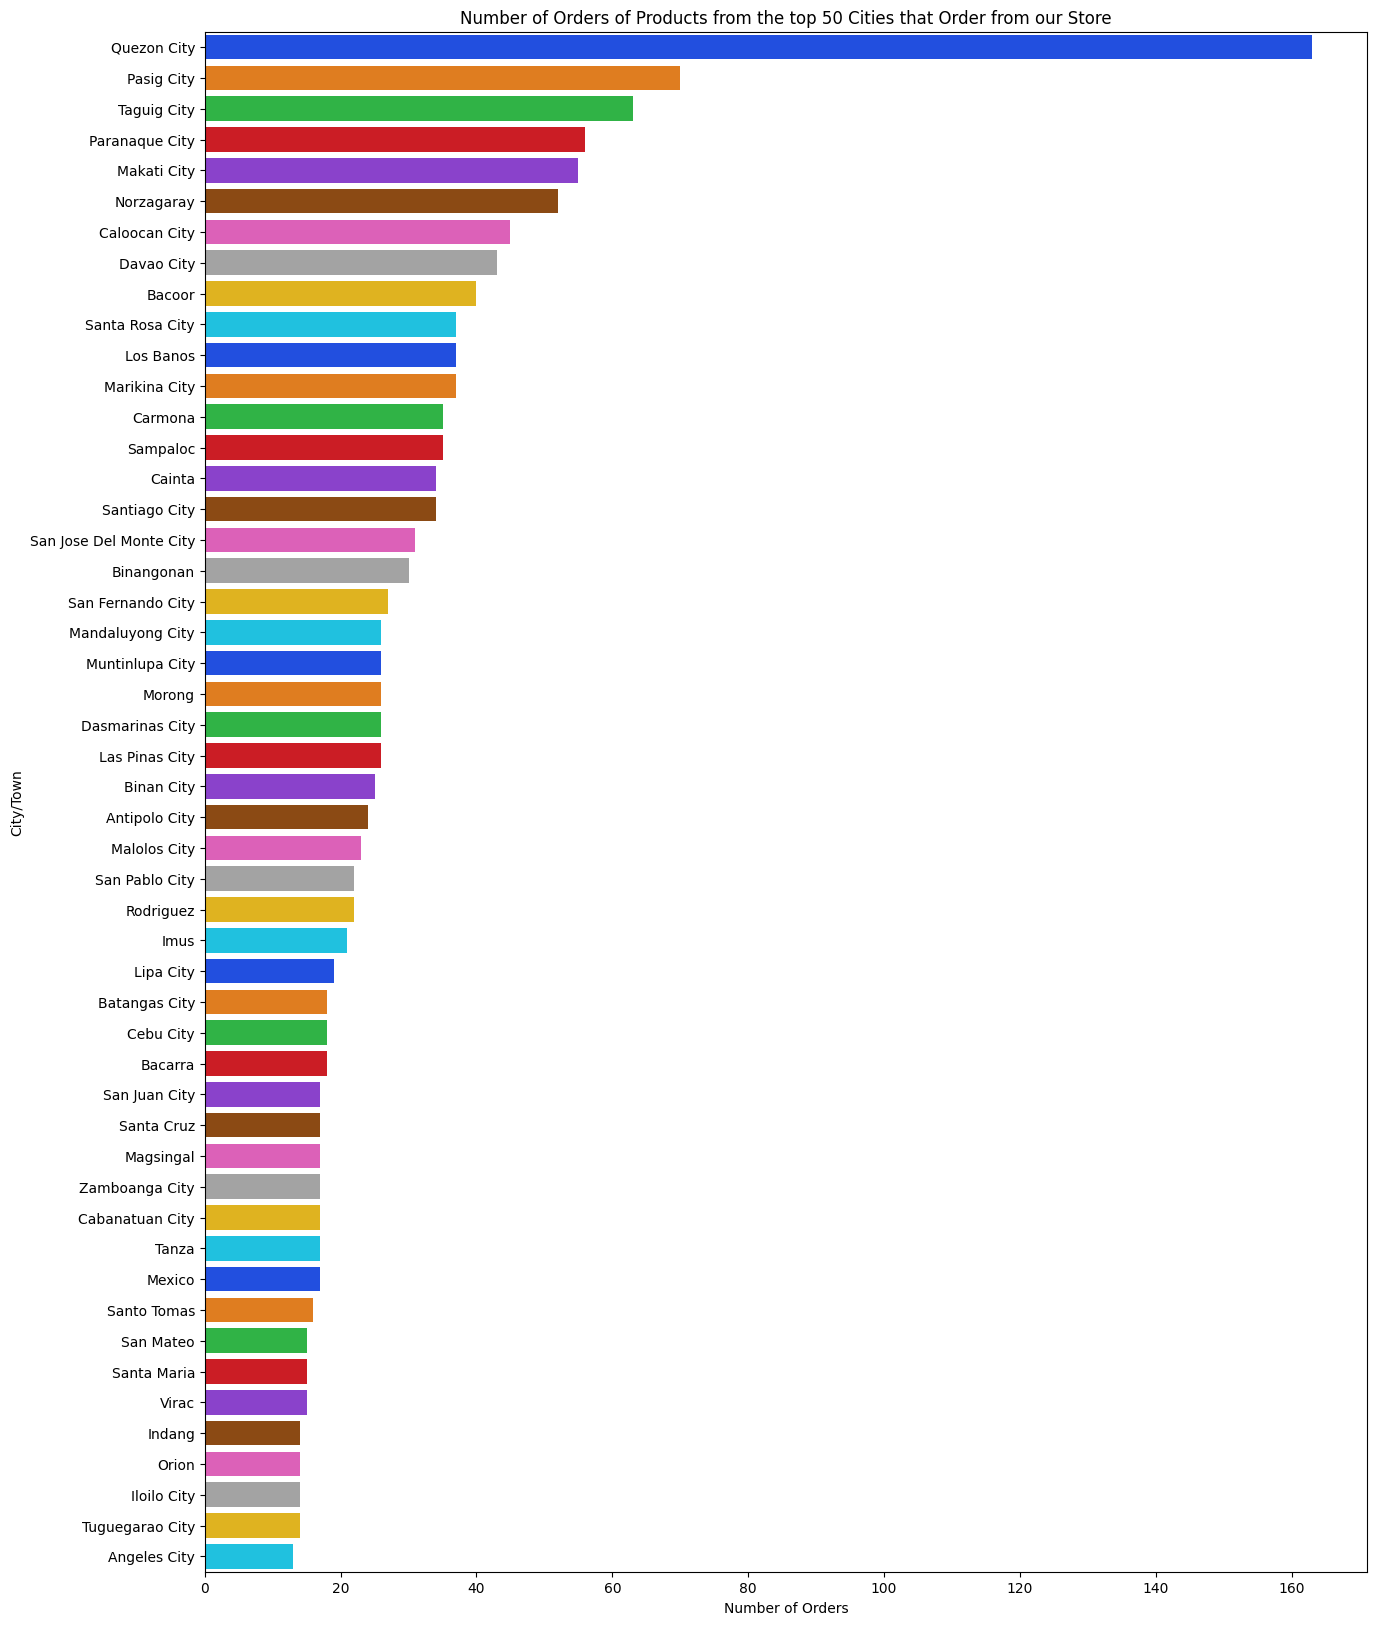

In [145]:
plt.figure(figsize = (15,20))
bp = sns.barplot(y=Cities.index, x=Cities.values, palette = 'bright', orient='h')
bp.set(ylabel='City/Town', xlabel='Number of Orders')
plt.title('Number of Orders of Products from the top 50 Cities that Order from our Store')
plt.show()

In [146]:
#Get the Quantity of Orders placed per Province
Provincial_count= df_completed_orders['Province'].value_counts()
Provincial_count.head()

Metro Manila    692
Cavite          232
Laguna          223
Bulacan         191
Rizal           185
Name: Province, dtype: int64

Here I have segmented it for Provinces. I will then do a visualization for it so that we can clearly see the Provinces and it is easier to understand the distribution of the orders for each Province.


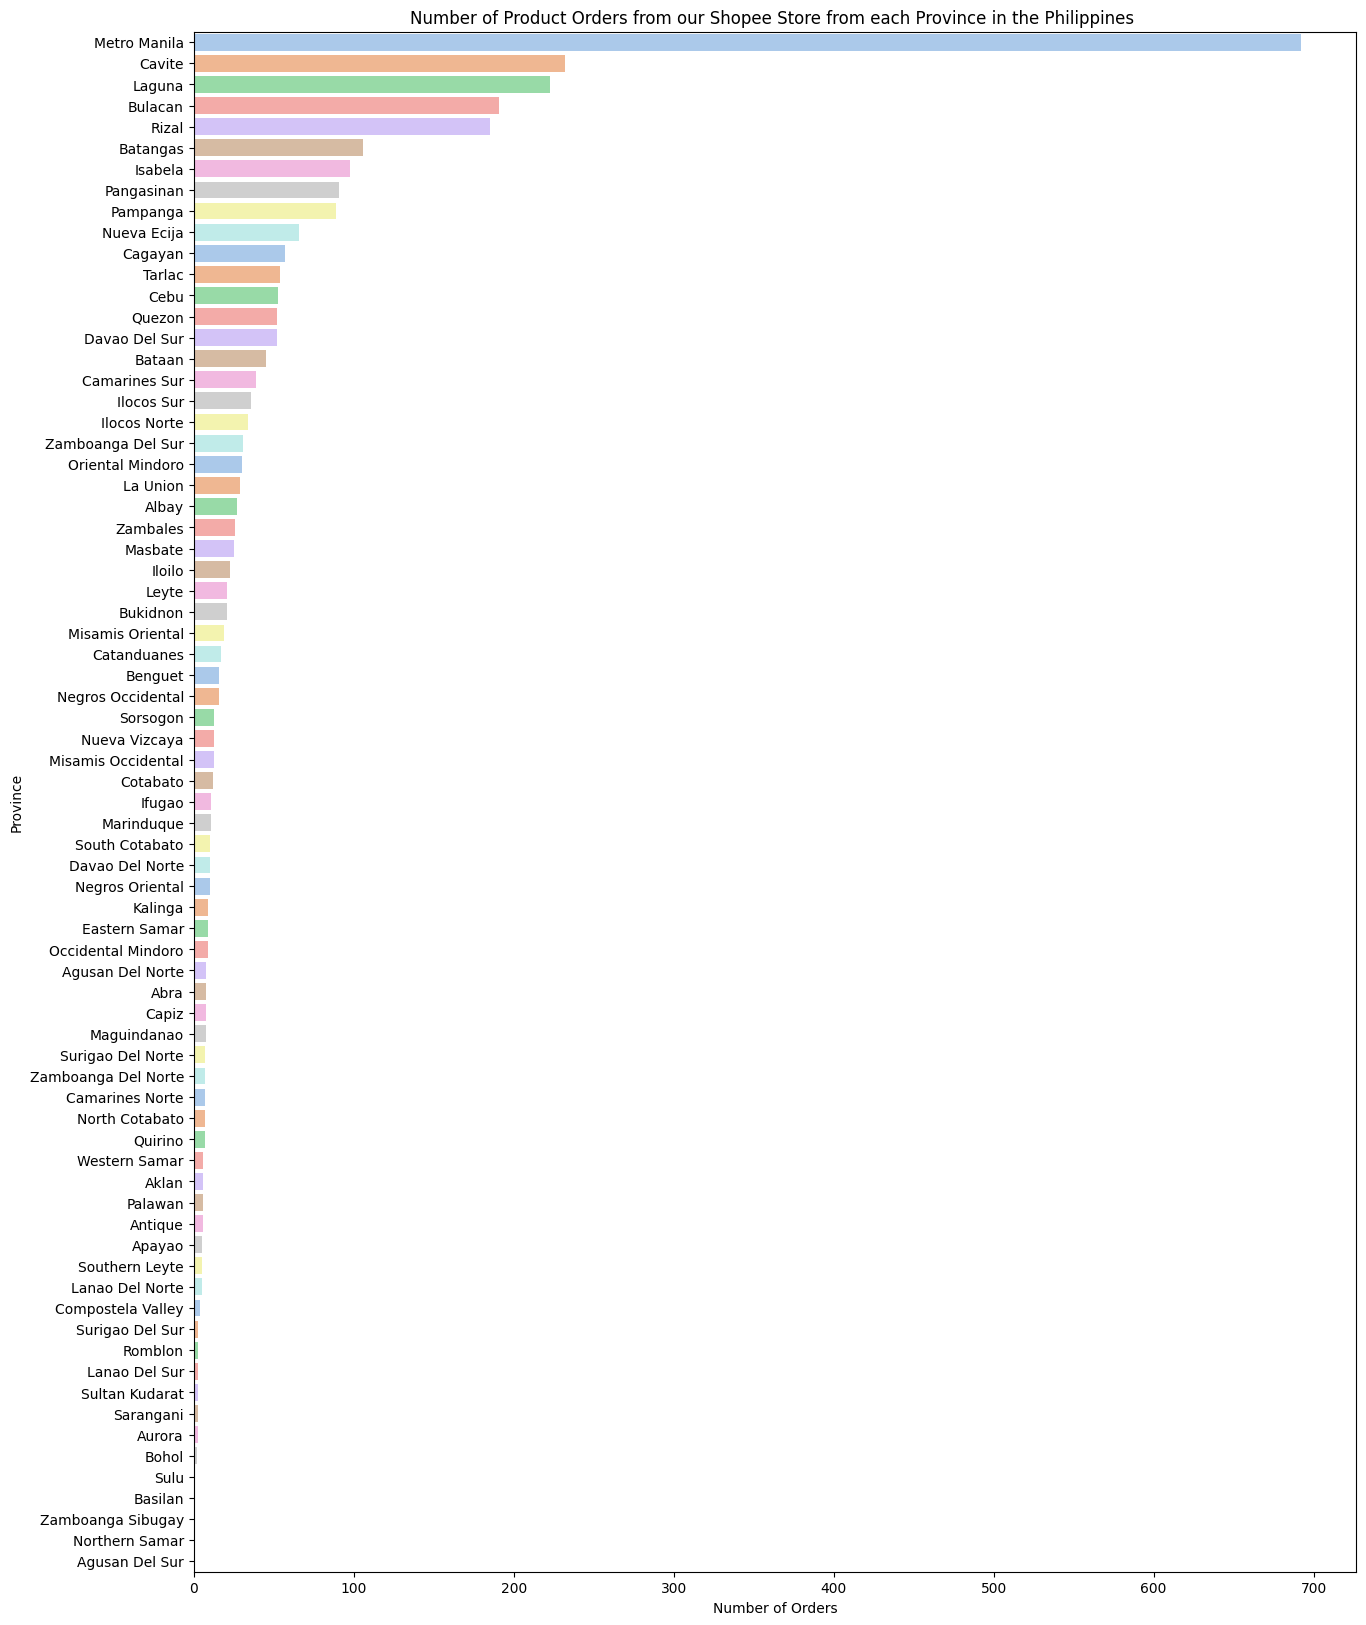

In [147]:
plt.figure(figsize = (15,20))
bp = sns.barplot(y=Provincial_count.index, x=Provincial_count.values, palette = 'pastel', orient='h')
bp.set(ylabel='Province', xlabel='Number of Orders')
plt.title('Number of Product Orders from our Shopee Store from each Province in the Philippines ')
plt.show()

Now I will graph the same data but in Percentages of the Product Sales. I will do both Bar graph and Pie chart for these. I will only focus on the top 25 Provinces as listing all the provinces will make the graph very tall.



In [148]:
#Showing the top 25 Provinces by total sales in a listed table format.

with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    Provincial_sales = df_completed_orders.groupby('Province')['Product Subtotal'].sum().reset_index() #grouping the orders by Province and summing up all their sales.
    Provincial_sales.sort_values(by='Product Subtotal', ascending=False, inplace=True) #Sorting the Values in a descending order.
    ps_top25= Provincial_sales.head(25) # Storing the top 25 Provinces

    #This will do the percentages.
    ps_top25['Percentage'] = (ps_top25['Product Subtotal'] / 703777) * 100

    #This will add the total of the other provinces that were not included
    ps_top25 = ps_top25.append({'Province':'Others', 'Product Subtotal': (703777 - ps_top25['Product Subtotal'].sum()),
                    'Percentage': (100- ps_top25['Percentage'].sum())}, ignore_index=True)
ps_top25, Provincial_sales.sum()

(              Province  Product Subtotal  Percentage
 0         Metro Manila            137631   19.556053
 1                Rizal             81935   11.642182
 2               Laguna             72196   10.258363
 3              Bulacan             61375    8.720802
 4              Isabela             59888    8.509514
 5               Cavite             43073    6.120263
 6             Batangas             16193    2.300871
 7           Pangasinan             14764    2.097824
 8             Pampanga             14608    2.075657
 9                 Cebu             13506    1.919074
 10            Bukidnon             13168    1.871047
 11          Ilocos Sur             12143    1.725404
 12             Cagayan             11220    1.594255
 13       Davao Del Sur             10519    1.494650
 14              Tarlac              8832    1.254943
 15              Quezon              8449    1.200522
 16         Nueva Ecija              8326    1.183045
 17               Leyte     

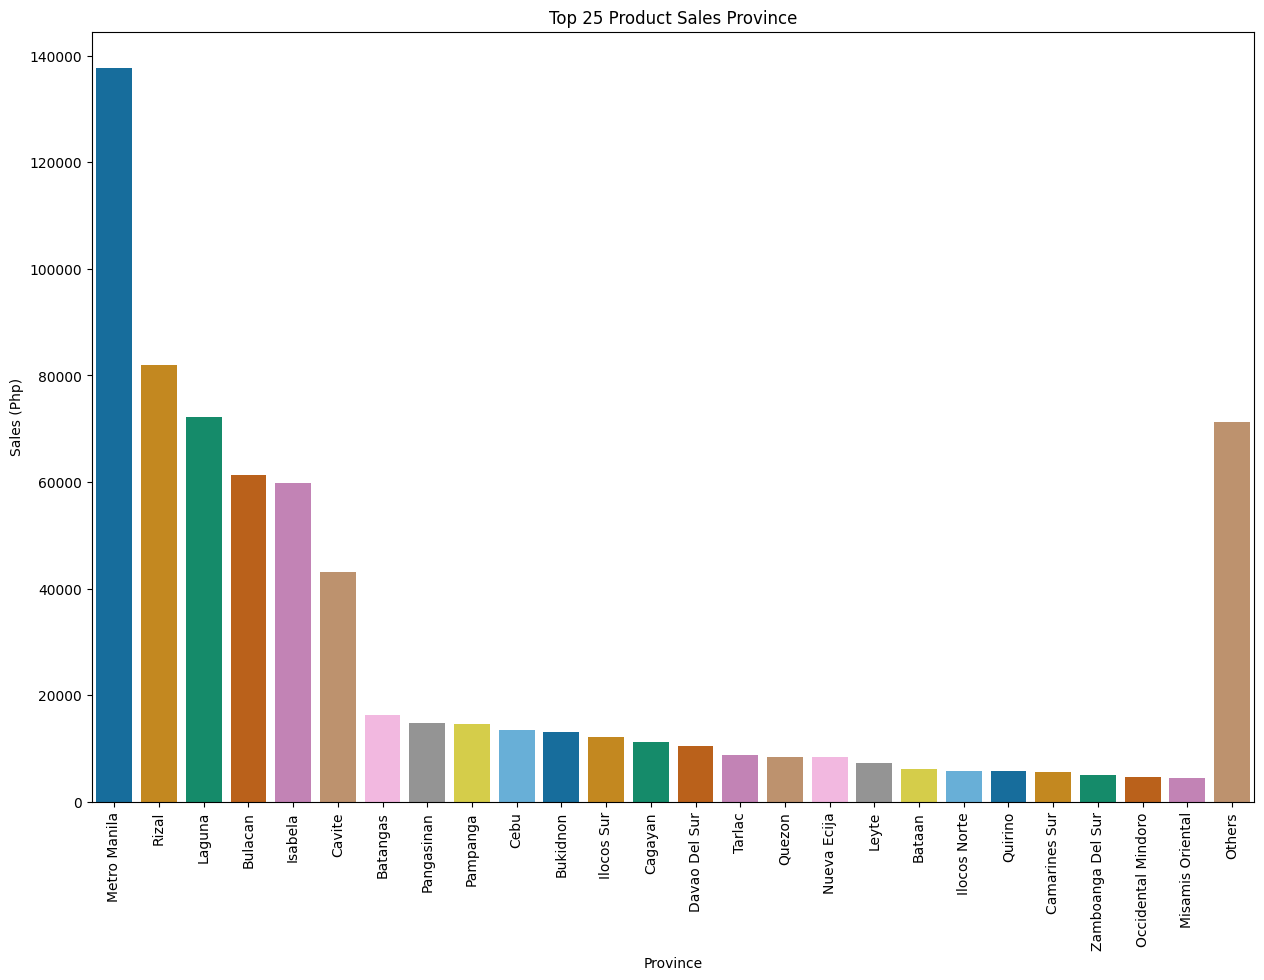

In [149]:
plt.figure(figsize = (15,10))
sns.barplot(x='Province', y='Product Subtotal', data=ps_top25, palette='colorblind')
plt.title('Top 25 Product Sales Province')
plt.xticks(rotation=90)
plt.ylabel('Sales (Php)')
plt.show()


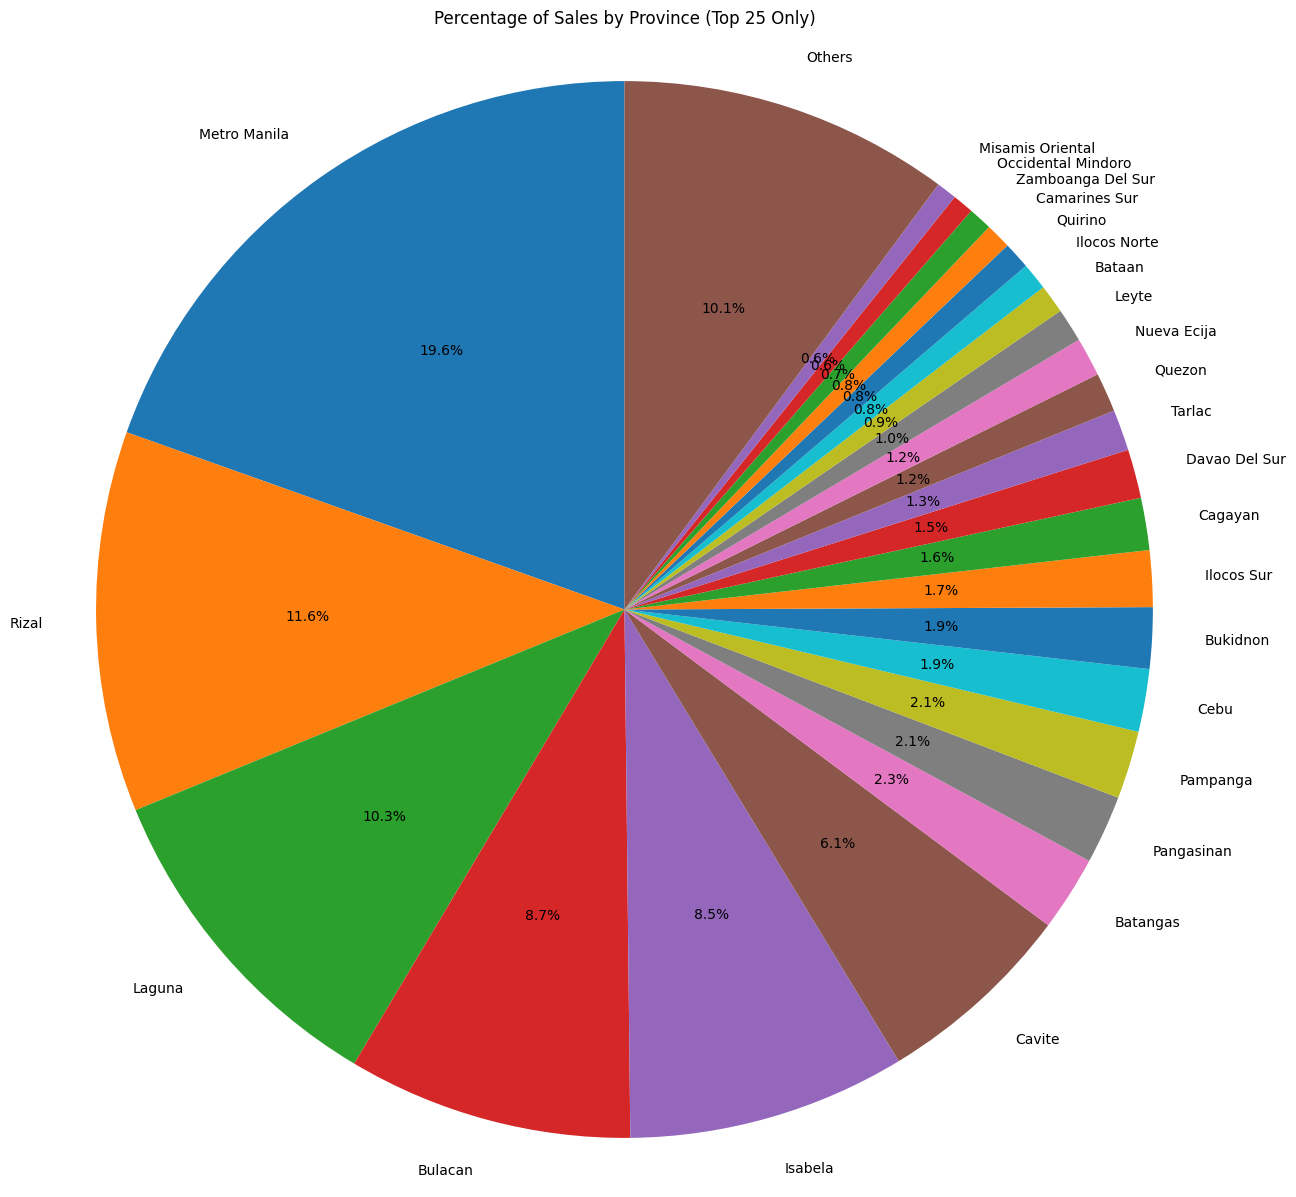

In [150]:
#Chart the percentage of the sales per province
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(ps_top25['Percentage'], labels=ps_top25['Province'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Percentage of Sales by Province (Top 25 Only)')
plt.show()

## Interpretation

***Based on the data and the graph, most of the orders are coming from Metro Manila, specially Quezon City. It is quite interesting to see that most of the orders (~ 60%) are coming from the top 6 Provinces and those provinces are near each other. It is also fascinating to me that Davao City reached the top 10 cities that order soap from my shop even though it is geographically very far from our Province (Quezon Province). As also seen above, the total sales of each Province were quantified and Metro Manila has contributed to 137k in total sales and next is Rizal with 81k, and at the last is Basilan which is also the farthest Province from my area which gave a total sales of 60 Php.***

Thinking about it, It's quite interesting that the distribution of the sales per province is similar to that of the Pareto Distribution (80% of the effects come from 20% of the causes - In this case, 20% of the Provinces account for more than a bit more than 80% of the sales).

I also forgot to drop some of the columns that are not needed in this analysis so I will do that now. I will drop these ff. columns.

**'Return / Refund Status'** - All Orders are completed,

**'Shipping Option'** - All orders go through J&T,

**'Shipment Method'** - Most of the orders are picked up by the courier,

**'Parent SKU Reference No.'** - Did not put any of it in the products,

**'SKU Reference No.'** - Same reason,

**'Variation Name'** - Don't need it. It's 99% empty.

In [151]:
df_completed_orders.drop(columns=['Return / Refund Status', 'Shipping Option', 'Shipment Method', 'Parent SKU Reference No.', 'SKU Reference No.', 'Variation Name', 'Remark from buyer', 'Note'], inplace=True)
df_completed_orders.head()

Order ID Order Status  Tracking Number* Estimated Ship Out Date  \
0  200620A7RESEFK    Completed      780406537692        2020-07-01 19:32   
1  200620A7RESEFK    Completed      780406537692        2020-07-01 19:32   
2  200620AA5CP9P7    Completed      780406650623        2020-07-01 20:15   
3  200620AD286HD3    Completed      780408841064        2020-07-01 21:07   
4  200623HX8Y1A6F    Completed      780419893117        2020-07-04 14:02   

          Ship Time Order Creation Date   Order Paid Time  \
0  2020-06-23 18:57    2020-06-20 19:32  2020-06-20 19:32   
1  2020-06-23 18:57    2020-06-20 19:32  2020-06-20 19:32   
2  2020-06-23 18:59    2020-06-20 20:15  2020-06-20 20:15   
3  2020-06-23 18:58    2020-06-20 21:07  2020-06-20 21:07   
4  2020-06-26 19:14    2020-06-23 21:03  2020-06-25 14:02   

                          Product Name  Original Price  Deal Price  Quantity  \
0  Bayabas (Mild Antiseptic Bath Soap)               0          35        15   
1      Acapulco (Antifungal Bath Soap)               0          35        20   
2      Acapulco (Antifungal Bath Soap)               0          35        40   
3  Bayabas (Mild Antiseptic Bath Soap)               0          35        40   
4   Citronella Antibacterial Bath Soap               0          35       100   

   Product Subtotal  Total Discount(PHP)  Price Discount(from Seller)(PHP)  \
0               525                 -525                              -525   
1               700                 -700                              -700   
2              1400                -1400                             -1400   
3              1400                -1400                             -1400   
4              3500                -3500                             -3500   

   Shopee Rebate(PHP)  SKU Total Weight  Number of Items in Order  \
0                   0               2.1                        35   
1                   0               2.8                        35   
2                   0               5.6                        40   
3                   0               5.6                        40   
4                   0              14.0                       100   

   Order Total Weight  Seller Voucher(PHP)  Seller Absorbed Coin Cashback  \
0                 4.9                    0                              0   
1                 4.9                    0                              0   
2                 5.6                    0                              0   
3                 5.6                    0                              0   
4                14.0                    0                              0   

   Shopee Voucher(PHP) Bundle Deals Indicator(Y/N)  \
0                  200                           N   
1                  200                           N   
2                  200                           N   
3                  200                           N   
4                    0                           N   

   Shopee Bundle Discount(PHP)  Seller Bundle Discount(PHP)  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Shopee Coins Offset(PHP)  Credit Card Discount Total(PHP)  \
0                      1900                                0   
1                      1900                                0   
2                       200                                0   
3                       100                                0   
4                         0                                0   

   Products' Price Paid by Buyer (PHP)  Buyer Paid Shipping Fee  \
0                                 1006                       65   
1                                 1006                       65   
2                                 1198                       75   


### I will now go to analysis of the best-selling products on my Shopee store. Although I already know the answer to this one, it will be nice to see it graphically.

In [152]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore", UserWarning)
    #Grouping the orders by Product and adding the quantity and Subtotal then sorting it by Sales (Product Subtotal)
    items = df_completed_orders.groupby('Product Name')[['Quantity','Product Subtotal']].sum().reset_index()
    items.sort_values(by='Product Subtotal', ascending=False, inplace=True)
    items['Sales Percentage'] = (items['Product Subtotal'] / items['Product Subtotal'].sum()) * 100
    items['Product Percentage'] = (items['Quantity'] / items['Quantity'].sum()) * 100
    items = items.head(10)

    #Creating extra Columns for the Percentage
    items = items.append({'Product Name': 'Other Products', 'Product Subtotal': (703777 - items['Product Subtotal'].sum()),
                          'Sales Percentage': 100 - items['Sales Percentage'].sum(),
                          'Product Percentage': 100 - items['Product Percentage'].sum()}, ignore_index=True)
items.head(11)

Product Name  Quantity  \
0                     Acapulco (Antifungal Bath Soap)    8224.0   
1                 Bayabas (Mild Antiseptic Bath Soap)    2105.0   
2                  Citronella Antibacterial Bath Soap    1685.0   
3         Honey-Oatmeal (Deep Moisturizing Bath Soap)     847.0   
4      Coffee Berry (Antioxidant Exfoliant Bath Soap)     469.0   
5   Nektar wild raw honey from pukyutan (Apis brev...      40.0   
6               Milk & Honey (Moisturizing Bath Soap)     379.0   
7   Patchouli-Cinnamon (Anti-dryness/Anti-Aging Ba...     325.0   
8   Handmade Herbal Soap Papaya Natural Soap (Natu...     261.0   
9                             Petmade Herbal Pet Soap      90.0   
10                                     Other Products       NaN   

    Product Subtotal  Sales Percentage  Product Percentage  
0             393174         55.866276           56.952909  
1              93262         13.251641           14.577562  
2              72938         10.363794           11.668975  
3              42626          6.056748            5.865651  
4              20494          2.912002            3.247922  
5              18116          2.574111            0.277008  
6              16686          2.370921            2.624654  
7              16480          2.341651            2.250693  
8              12401          1.762064            1.807479  
9               5400          0.767289            0.623269  
10             12200          1.733504            0.103878

Graphing the Quantity and Sales using a bar chart.

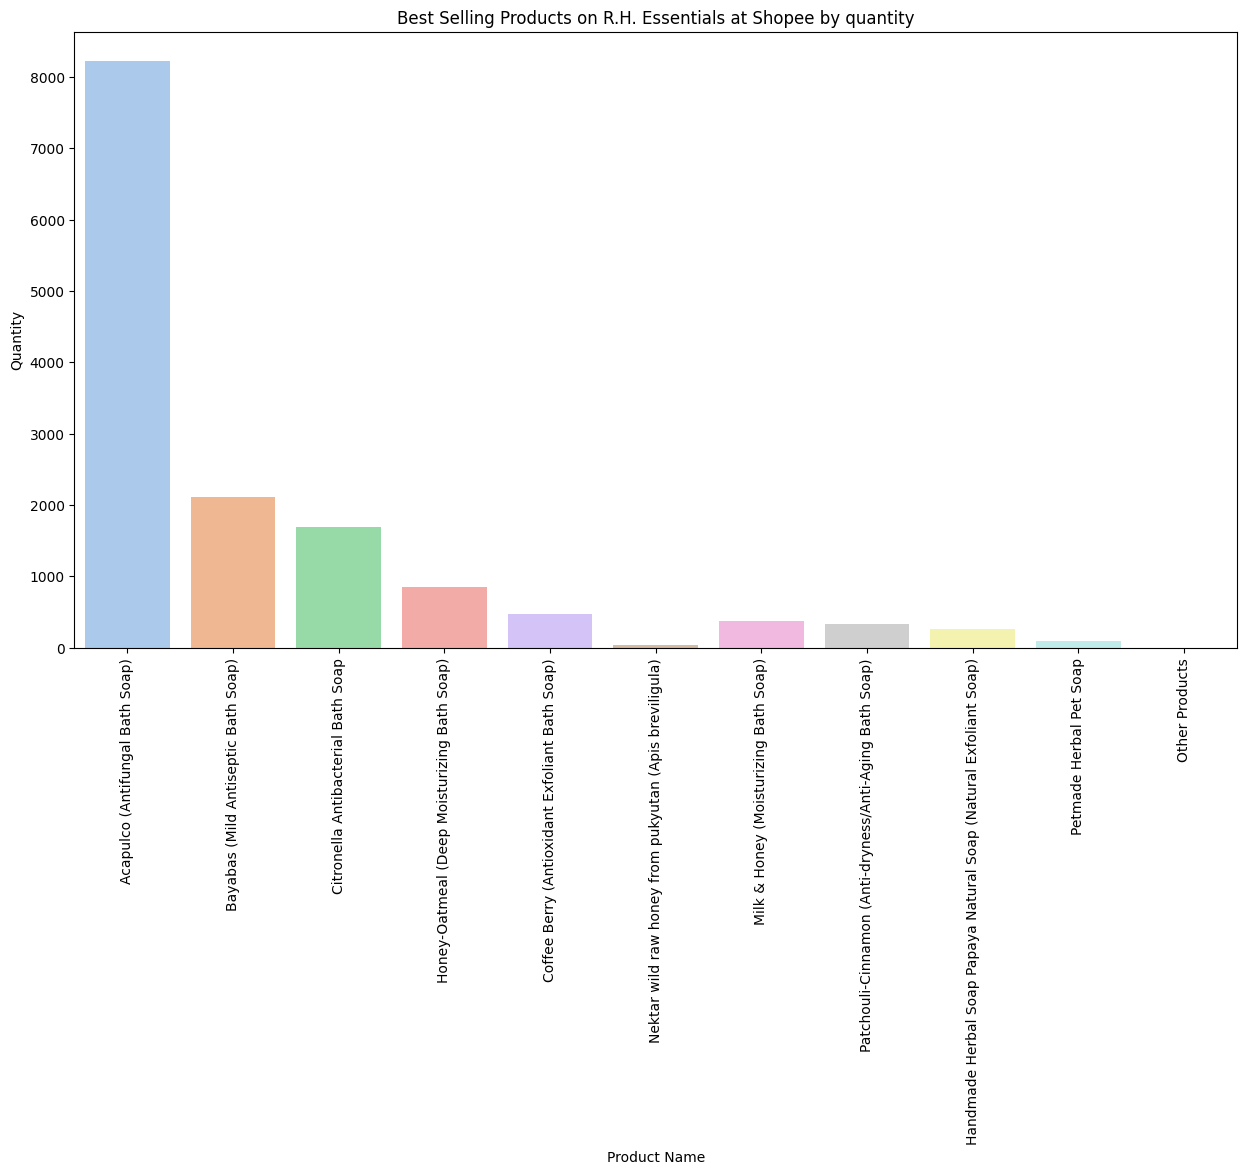

In [153]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'Product Name', y = 'Quantity', data=items, palette = 'pastel')
plt.xticks(rotation=90)
plt.title('Best Selling Products on R.H. Essentials at Shopee by quantity')
plt.show()

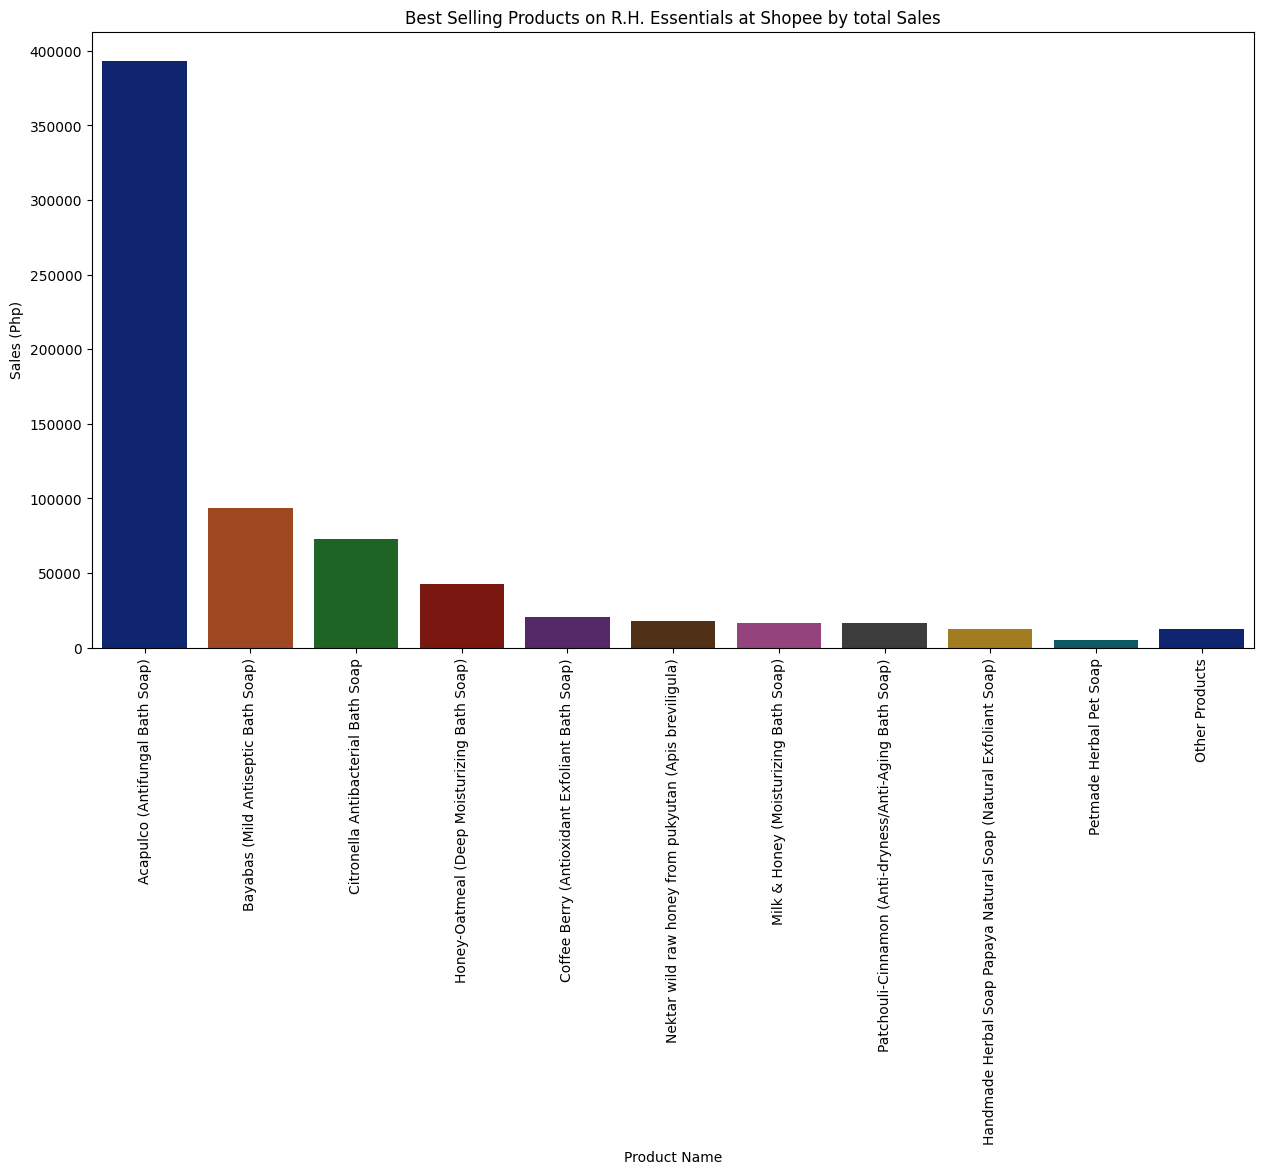

In [154]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'Product Name', y = 'Product Subtotal', data=items, palette = 'dark')
plt.xticks(rotation=90)
plt.ylabel('Sales (Php)')
plt.title('Best Selling Products on R.H. Essentials at Shopee by total Sales')
plt.show()

### By Percentage

Here, I will use a pie chart to show the percentages.

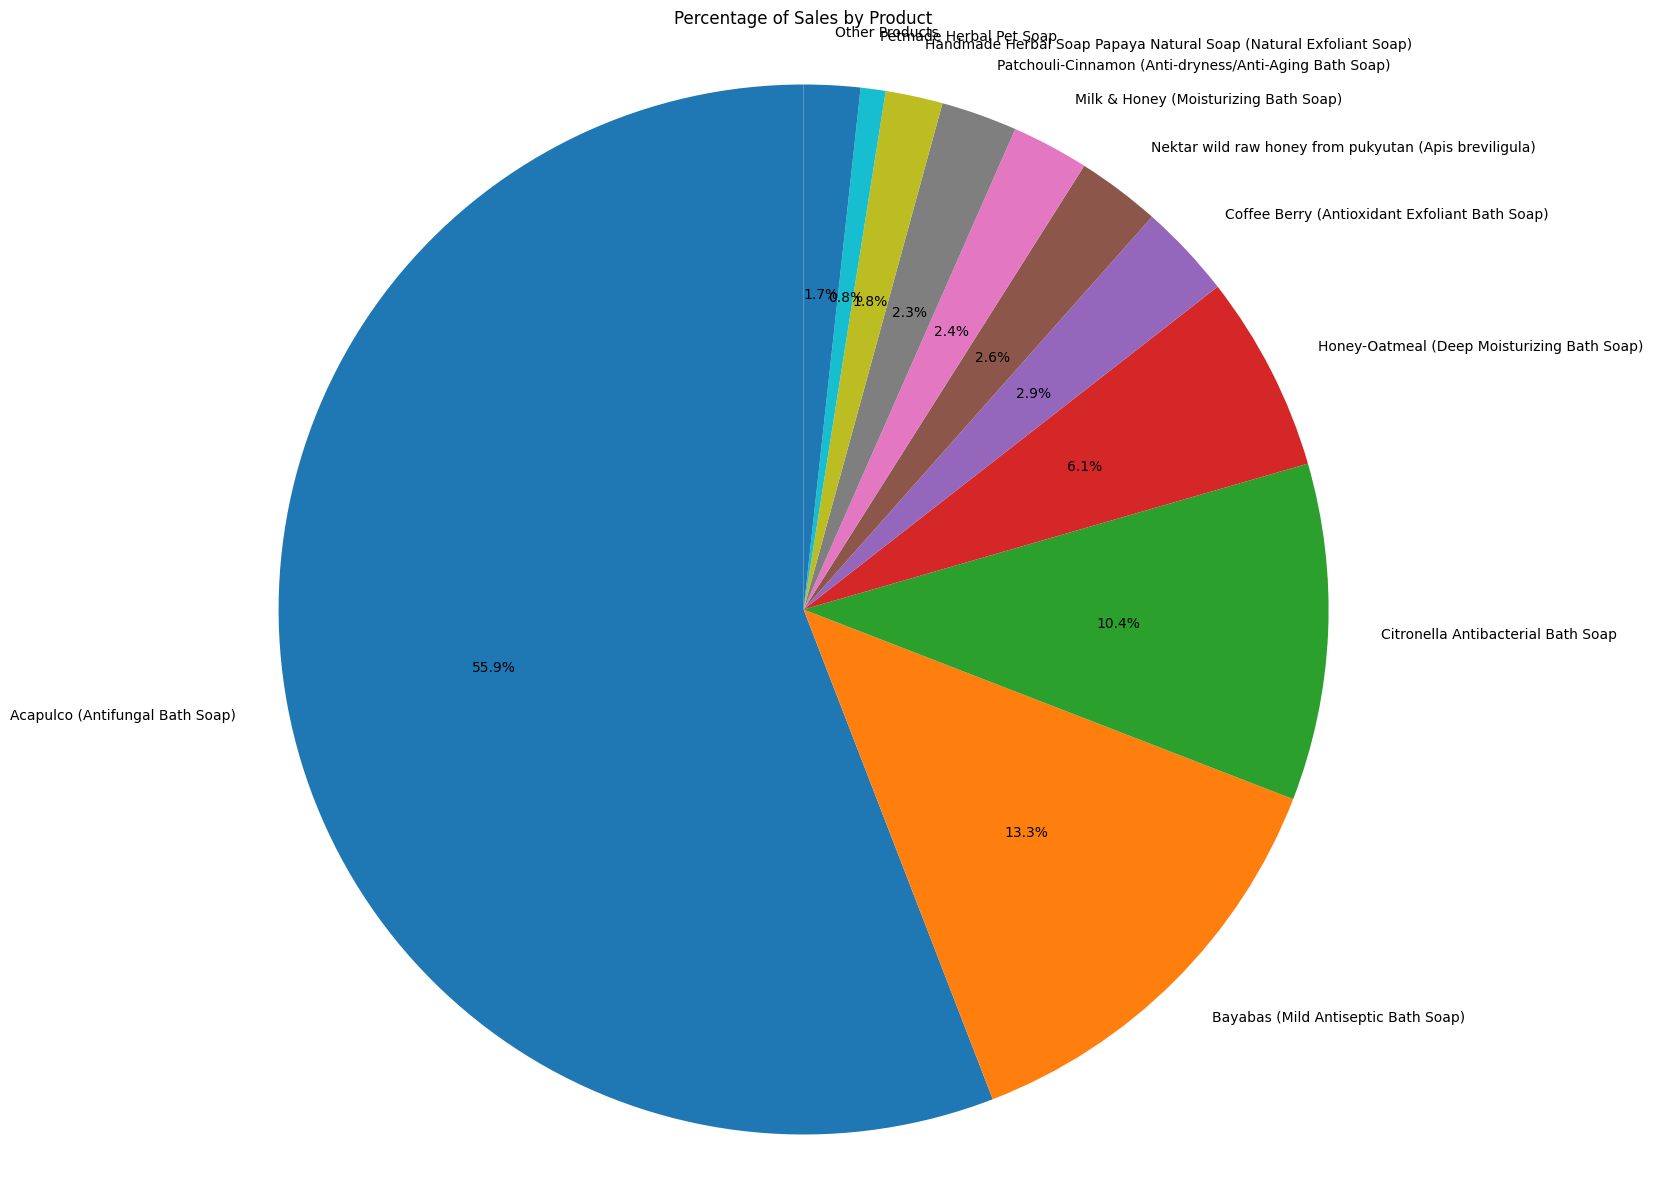

In [155]:
#Chart the percentage of the sales
fig, ax = plt.subplots(figsize=(20,15))
ax.pie(items['Sales Percentage'], labels=items['Product Name'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Percentage of Sales by Product')
plt.show()

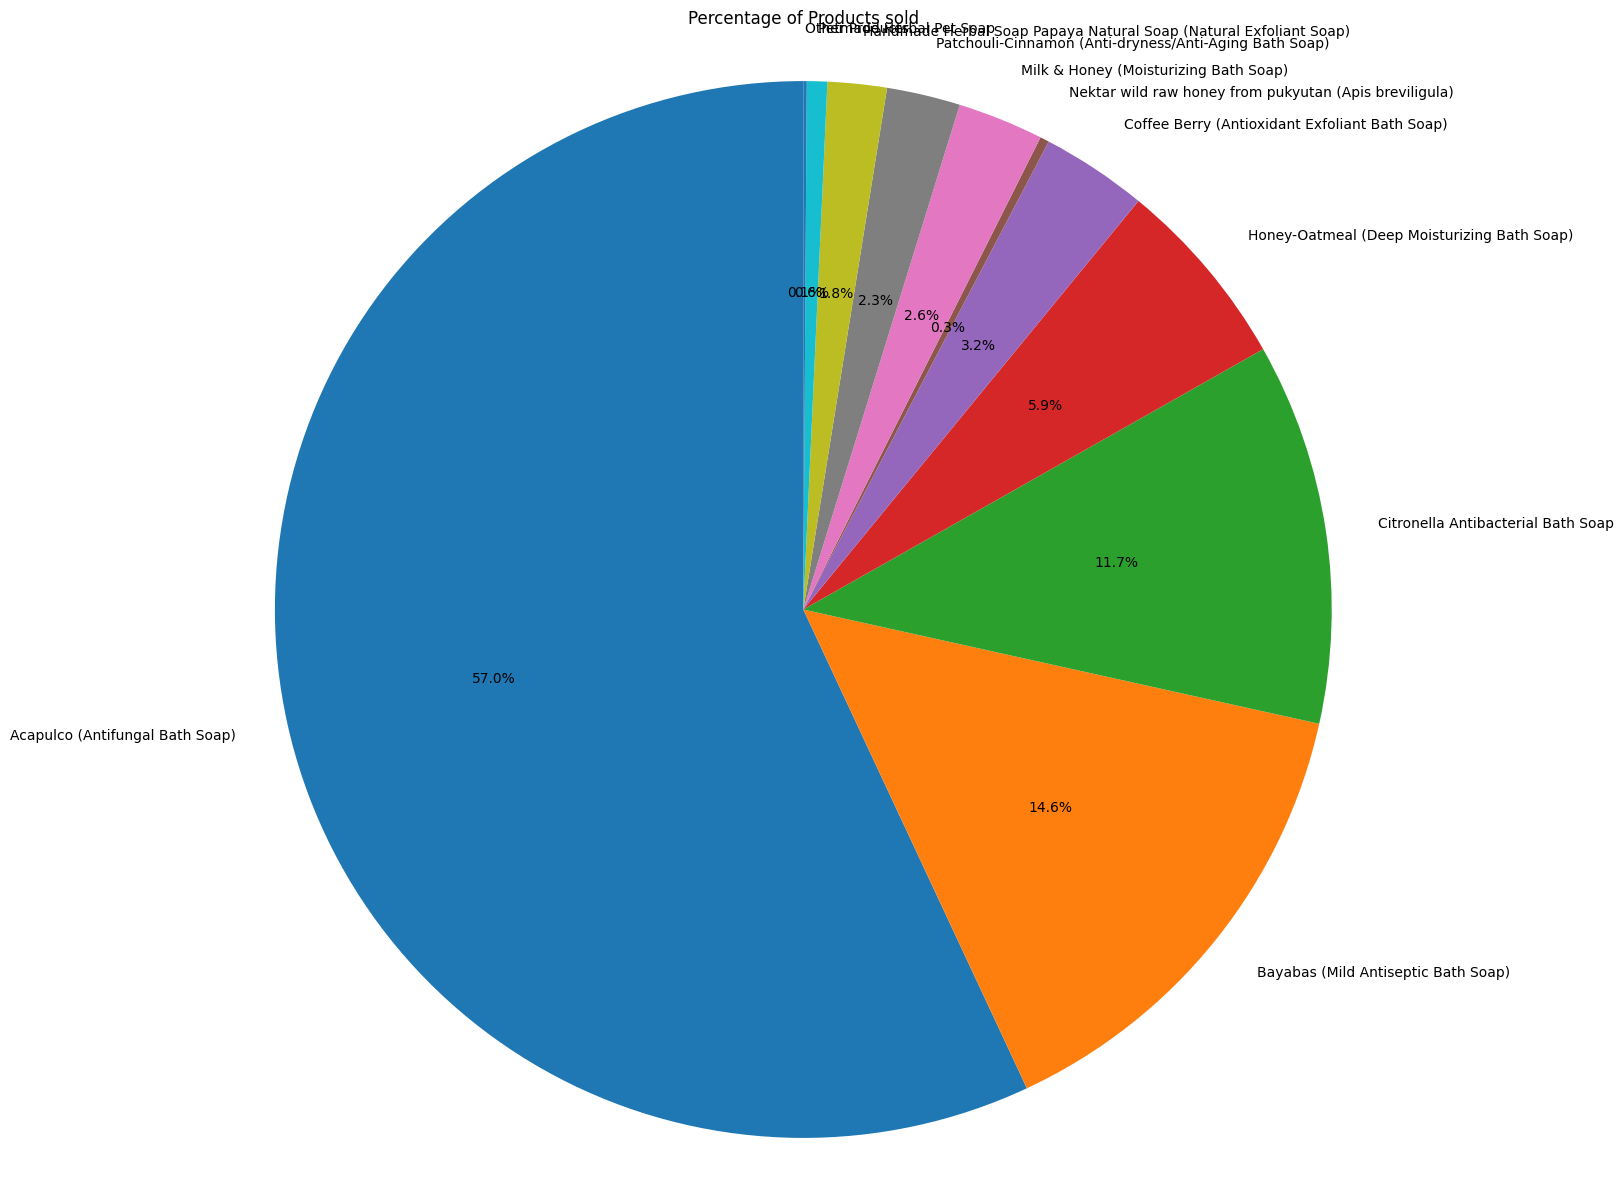

In [156]:
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(items['Product Percentage'], labels=items['Product Name'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Percentage of Products sold')
plt.show()

## Interpretation of the results and graphs.

As seen in the data, the Acapulco (Antifungal Bath Soap) far outsells all the products in terms of total sales and quantity sold in our shop (56% and 57% respectively) even if you combine them all. This is an indication that we have a very effective product with good quality and a lot of demand since are a lot of sales for it without that much marketing done for it (since I am quite inconsistent when it comes to marketing the product. lol).

It just occured to me that I want to see how many are being sold per product in each province. For this one I'll just make a table.

In [157]:
province = df_completed_orders.groupby(['Province', 'Product Name'])['Quantity', 'Product Subtotal'].sum().reset_index()
province.head()

<ipython-input-157-b9edbc27d8da>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  province = df_completed_orders.groupby(['Province', 'Product Name'])['Quantity', 'Product Subtotal'].sum().reset_index()


Province                         Product Name  Quantity  \
0              Abra      Acapulco (Antifungal Bath Soap)        15   
1              Abra  Bayabas (Mild Antiseptic Bath Soap)         4   
2              Abra   Citronella Antibacterial Bath Soap         1   
3  Agusan Del Norte      Acapulco (Antifungal Bath Soap)        35   
4    Agusan Del Sur      Acapulco (Antifungal Bath Soap)         6   

   Product Subtotal  
0               800  
1               240  
2                50  
3              2064  
4               360

In [158]:
top_provinces = province.sort_values(by=['Quantity', 'Province'], ascending=[False, True])
top_provinces.head(10)


Province                         Product Name  Quantity  \
139       Isabela      Acapulco (Antifungal Bath Soap)      1349   
186  Metro Manila      Acapulco (Antifungal Bath Soap)      1302   
155        Laguna      Acapulco (Antifungal Bath Soap)       891   
261         Rizal      Acapulco (Antifungal Bath Soap)       819   
263         Rizal   Citronella Antibacterial Bath Soap       595   
45        Bulacan      Acapulco (Antifungal Bath Soap)       452   
77         Cavite      Acapulco (Antifungal Bath Soap)       434   
187  Metro Manila  Bayabas (Mild Antiseptic Bath Soap)       428   
46        Bulacan  Bayabas (Mild Antiseptic Bath Soap)       365   
156        Laguna  Bayabas (Mild Antiseptic Bath Soap)       294   

     Product Subtotal  
139             57658  
186             64784  
155             36269  
261             33075  
263             21030  
45              18875  
77              22860  
187             20996  
46              14995  
156             11263

Here are the top 10 products being sold and the Province in which the product is sold.


## **Sales Analysis of Time-Series Data**

Now, I will be doing the analysis of the day-to-day sales of the products in the shop. I will check the trends and seasonality of the shop and if I'm able to, I will try to do some forecasting. Dealing with daily sales data needs to do some time-series data analysis and I'm not really proficient yet with such, so I will try to do my best to analyze and study the data and make the best of what I know and what I will learn while doing this so that it will be beneficial for the growth of my business.

In [159]:
#Change the Order Creation date to datetime with dates only without the time
df_completed_orders['Order Creation Date'] = pd.to_datetime(df_completed_orders['Order Creation Date'], format='%Y-%m-%d').dt.date
trends = df_completed_orders.groupby('Order Creation Date')['Product Subtotal'].sum().reset_index()
trends.rename(columns = {'Product Subtotal': 'Daily Sales'}, inplace=True)

trends.head()

Order Creation Date  Daily Sales
0          2020-06-20         4025
1          2020-06-23         3500
2          2020-06-24           50
3          2020-06-26         1470
4          2020-06-27         2175

In [160]:
#Analyzing some descriptive statistics
Q1 = trends['Daily Sales'].quantile(0.25)
Q3 = trends['Daily Sales'].quantile(0.75)
mean = trends['Daily Sales'].mean()
std = trends['Daily Sales'].std()

IQR = Q3 - Q1
print(f'Inter Quartile Range: {IQR}')

Inter Quartile Range: 685.0


In [161]:
trends.describe()

Daily Sales
count    915.000000
mean     769.155191
std     1064.645474
min       45.000000
25%      215.000000
50%      420.000000
75%      900.000000
max    15000.000000

I will be doing a boxplot here to visualize how the datapoint are being distributed and to have some idea on what to do.

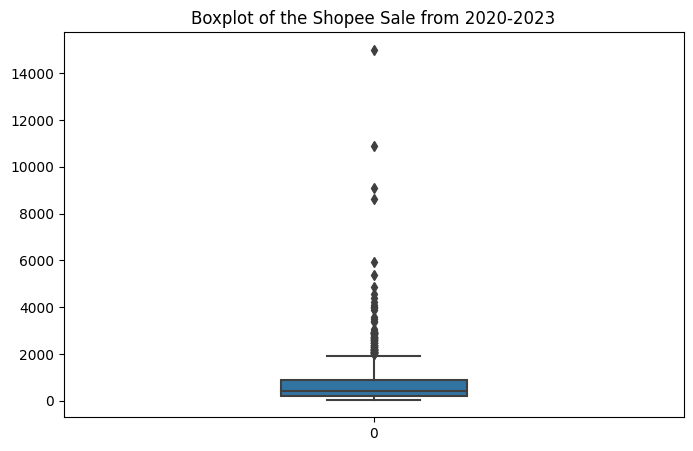

In [162]:
#boxplot

plt.figure(figsize = (8,5))
sns.boxplot(trends['Daily Sales'], width=0.3)
plt.title('Boxplot of the Shopee Sale from 2020-2023')
plt.show()

Based on the desriptive statistics and the graph, we can see here that the distribution of the data will be skewed (a measure of how asymmetrical our data is distributed) extremely to the right since the outliers of the data are way to extreme. The mean of the sales data is 769.16 and the median is 420 which means that the mean was influenced extremely by the extreme values of which the highest is 15,000. The lowest sale we got in this dataset is 45 since this data did not account for the days without sales since this is a list of all the completed orders of the products in Shopee. Since the dataset is way too skewed the boxplot looks way too small. It was a good thing that I had the numbers printed so that I can still understand the graph in a more detailed manner.

I will now plot the dataset to check the distribution of the graph in a histogram to see what distribution pattern of the values in the histogram will be. I will first check the normal distribution. I will inlay the Probability Density Function to assess how well our shop data fits with a normal distribution.

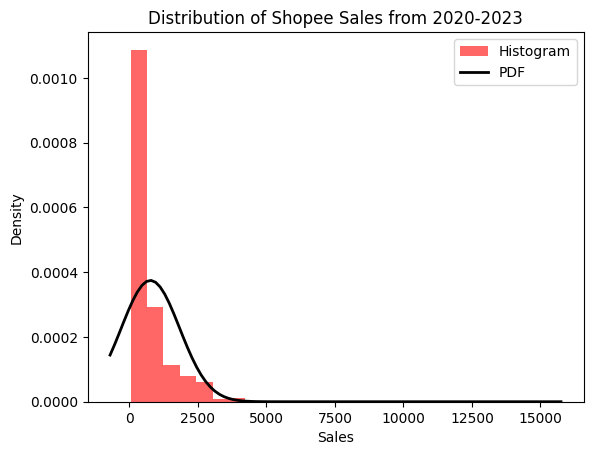

In [163]:
from scipy.stats import norm #import the normal distribution from the scipy library.


trends['Daily Sales'].plot(kind='hist', bins=25, density=True, alpha=0.6, color='r', label='Histogram')

#Create a Probability Density Function for the graph.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Title and labels
plt.title('Distribution of Shopee Sales from 2020-2023')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

Based on the data and confirmed by our graph it shows our data is skewed to the right which means that there are a lot of occurences of high values to our dataset which means that there are of occurences of outliers (really high sales) for a specific day. Since the data does not consider zeros here, most of the days that has a sale on the shop has modest values but there are days where the sales are extremely high.

As you can also see here, the Probability Density Function (describes the probability of a certain value (a random continuous variable) on the data to fall within the value range of a distribution curve), which in this case is the normal distribution greatly mismatches the our data so I need to find the best fit curve for the histogram. For that, I will use the t-distribution because in the case of the data a t-distribution is a good distribution to use when the tails are very heavy and I have a lot of outliers in the data because those skewness and heaviness of outliers will substantially impact the analysis of the data. This choice ensures that the analysis, especially in terms of estimating the central tendency (the center of our data) and performing hypothesis testing, is more reliable and less influenced by the skewness and outliers in the data. For that, I will be importing the t distribution in the scipy library to do so.


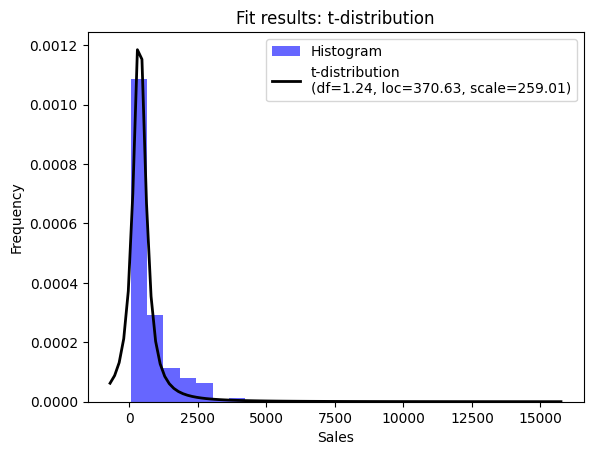

In [164]:
from scipy.stats import t

trends['Daily Sales'].plot(kind='hist', bins=25, density=True, alpha=0.6, color='b', label='Histogram')

#Create a distribution that will fit the data.
df, loc, scale = t.fit(trends['Daily Sales'])

#will compute for the degrees of freedom (df), location of the central point of the data(loc), and scale (which is like the standard deviation)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, df, loc, scale)
plt.plot(x, p, 'k', linewidth=2, label=f't-distribution\n(df={df:.2f}, loc={loc:.2f}, scale={scale:.2f})')

title = "Fit results: t-distribution"
plt.title(title)
plt.xlabel('Sales')
plt.legend()
plt.show()


Now looking on the adjusted graph, the fitted t-distribution curve now matches the data. And based on the metrics of the t-distribution, the degress of freedom of 1.24 means that the data will have a high probability of extreme values, which is true based on the other analysis made and by looking at the data. I will not discuss here yet the reasons on why the extreme values are present in the data. I will still do some analysis for it though. I know the reasons for it but I will discuss it in the later sections of the project as to why those things are so. For the loc (which is the location of the center tendency of the data - basically the mean) the t-distribution metric says that it is 370.63 compared to the actual mean 769.16 which is far from the actual mean which means that the mean (average) is not a good description of the central tendency of the data. This shows that the data has some very high values, pushing the average up. so the median might give a more stable center point. Also, the large spread of values (reflected in a high standard deviation and range) compared to the middle 50% of values (IQR) also confirms this inconsistency. So, in this case, the median of the data (420 🥦 lol) is a closer measure of the central tendency of the data than the mean.

## **Analysis of the seasonality, trend, and anomalies in the daily completed sales data.**

Now I will analyze the time-series data to find the overall trend of the data, check if there is seasonality, check for anomalies in the data. I will not do forecasting for this analysis. Since I will do a lot of changes for the soap for the coming months and there will be a major overhaul in the works by 2024. First, I will plot all the daily sales in a lineplot.

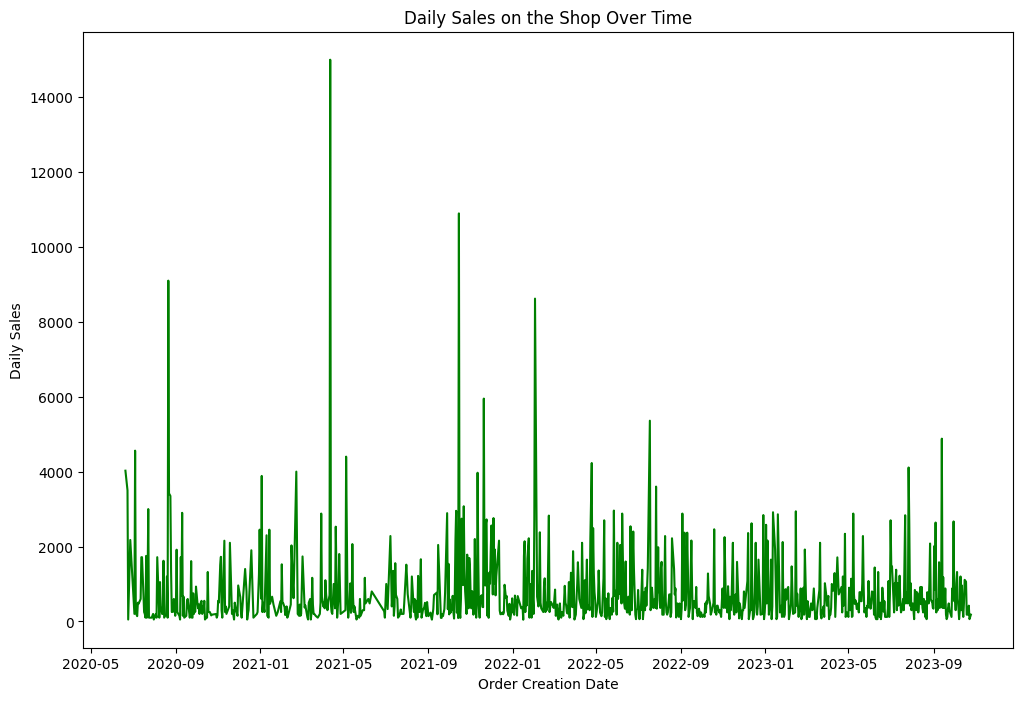

In [165]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Order Creation Date', y='Daily Sales', data=trends, color='green')
plt.title('Daily Sales on the Shop Over Time')
plt.show()

***As seen from the graph there are extreme values for this dataset this was also noted in the t-distribution statistic.There are 4 days in the data that has more than 8,000 sales. Now I will do seasonal decomposition on the data which will separate the data into 3 components (Seasonality, Trend, and Residual) so that I have a clearer picture on what is happening for the sales of my products.***

> Seasonality- to show the recurring seasons of the data. Like when having a sale day Shopee 9.9, 10.10, or 12.12 do the sales go up?

> Trend - to show the overall direction or trend of the data over time. Is it increasing or decreasing.

> Residuals - The residuals that cannot be explained when the Seasonality and Trend was removed in the data. It will show the random fluctuations that cannot be explained by the Seasonality and the Trend in the data.

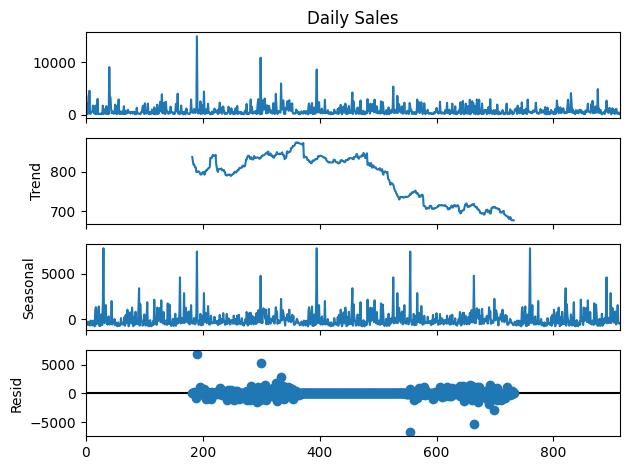

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose #import seasonal decomposition so that I won't need to manualy compute for it.

result = seasonal_decompose(trends['Daily Sales'], model='additive', period=365)  # For daily data, and assuming yearly seasonality
result.plot()
plt.show()

After visually inspecting the time series data and considering the nature of the sales numbers, I observed that the seasonal variations remained relatively constant over time. I also did some trial error on this one while studying what to do. This led me to choose an additive model for seasonal decomposition, as it is more suited to data where seasonal patterns do not change in proportion to the overall level of the time series.

Based on the graph showing the seasonal decomposition the trend of the sales is generally decreasing over time. This is partly due to me not doing anything to increase the sales of the soap for a while when I started working in Research, then in Clinical Research.

For the seasonality, the graph is showing a recurring pattern indicating seasonality which probably shows that the data points where the promotinal marketing, and Shopee sales happened. As of now, I am have not factored the times where promotions happened. I will do this after this analysis.

For the residual, after removing the trend and seasonality for the data, It shows that there were 4 days in the data that the seasonality and the trend cannot account for, which means these 4 data points are anomalies that were not captured or explain for by the seasonal decomposition. I have said in the previous portion that I will explain it - The explanation for those datas was that those were the times where a reseller called me and they said that they will be ordering a large quanitity of soaps from me. So those events were only one-off events. Although I'm not sure if some of those days coincided with a Sale day or Store Promotion Day. I will inspect it later.

Now that the seasonal decomposition was done. I will be analyzing the dataset if the Shopee sale days (usualy the days with the same number as the month number) reflect the seasonality of the dataset. If those days have a sale value of higher than the third quartile (900), this would be somewhat of a good evidence supporting my hunch that the seasonality are factored in by the Shopee sale dates. I will also do some statistical testing to see whether the change is statistically significant. Meaning the change contributed to a statistically higher or lower sales.

In [167]:
#transform the types of the Date to datetime in order to do some analysis.
trends['Order Creation Date'] = pd.to_datetime(trends['Order Creation Date'], format='%Y-%m-%d')
shopee_sale = trends[trends['Order Creation Date'].dt.day == trends['Order Creation Date'].dt.month]
shopee_sale = shopee_sale.sort_values(by='Daily Sales', ascending=False).copy()

shopee_sale.head()

Order Creation Date  Daily Sales
395          2022-02-02         8620
202          2021-05-05         4400
325          2021-11-11         3970
645          2022-12-12         2620
353          2021-12-12         2157

In [168]:
shopee_sale['Daily Sales'].mean()

1342.4615384615386

This shows here that the mean of the Sale Dates for the platform is higher than that of the whole data which might indicate that the sales for those days are higher. But I need to do some statistical test to confirm that this was the case.

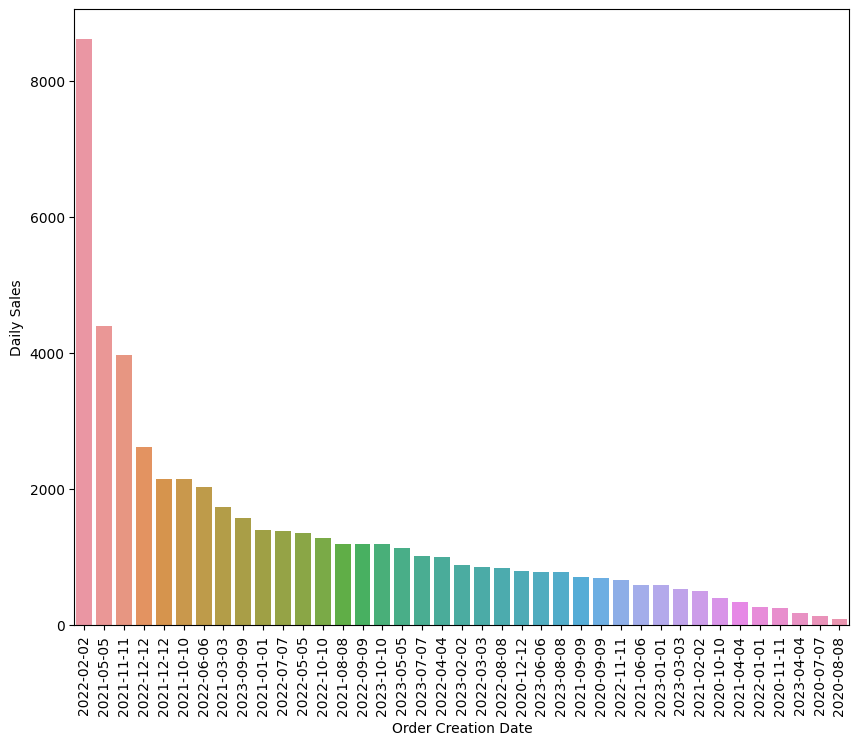

In [169]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Order Creation Date', y='Daily Sales', data=shopee_sale)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: shopee_sale['Order Creation Date'].iloc[x].strftime('%Y-%m-%d')))

plt.xticks(rotation=90)

plt.show()

This graph shows that one of the dates where the very transaction happened coincided with a Platform Sale so that order boosted the Platform Sale to a way higher total Sales for that day.

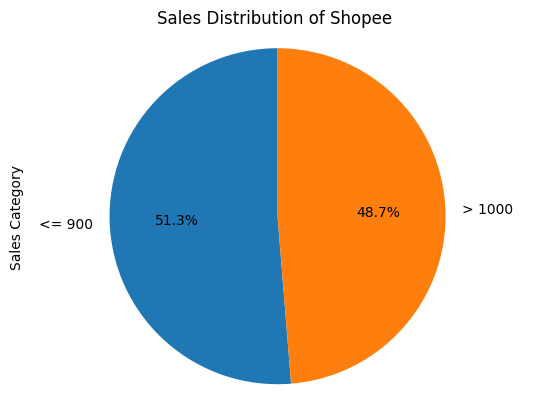

In [170]:
shopee_sale['Sales Category'] = ['> 1000' if x > 900 else '<= 900' for x in shopee_sale['Daily Sales']]
sales_counts = shopee_sale['Sales Category'].value_counts()

sales_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sales Distribution of Shopee ')
plt.show()

In [224]:
#convert the data to datetime just in case
trends['Order Creation Date'] = pd.to_datetime(trends['Order Creation Date'])
shopee_sale['Order Creation Date'] = pd.to_datetime(shopee_sale['Order Creation Date'])
trends['Order Creation Date'] = trends['Order Creation Date'].dt.normalize()
shopee_sale['Order Creation Date'] = shopee_sale['Order Creation Date'].dt.normalize()

filtered = trends[~trends['Order Creation Date'].isin(shopee_sale['Order Creation Date'])]

filtered.head()

Order Creation Date  Daily Sales
0          2020-06-20         4025
1          2020-06-23         3500
2          2020-06-24           50
3          2020-06-26         1470
4          2020-06-27         2175

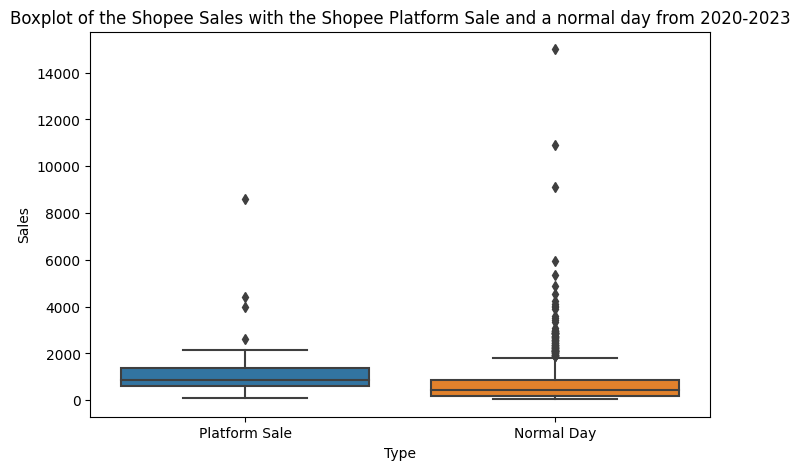

In [172]:
#boxplot

data = {
    'Sales': pd.concat([shopee_sale['Daily Sales'], filtered['Daily Sales']]),
    'Type': ['Platform Sale'] * len(shopee_sale) + ['Normal Day'] * len(filtered)
}

df = pd.DataFrame(data)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Sales', data=df)
plt.title('Boxplot of the Shopee Sales with the Shopee Platform Sale and a normal day from 2020-2023')
plt.show()

Based on the statistics of the 2 datas, Mann Whitney U is the appropriate test to compare the two.

In [173]:
from scipy.stats import mannwhitneyu


sales_with_spromo = np.array(shopee_sale['Daily Sales'])
sales_without_spromo = np.array(filtered['Daily Sales'])

stat, p = mannwhitneyu(sales_with_spromo, sales_without_spromo, alternative='two-sided')
print('Statistics=%.3f, p=%.5f' % (stat, p))

Statistics=24258.500, p=0.00001


Based on this graph 48.7% of the sales during the Shopee sales period has a sales value of higher than the 3rd quartile of the sales and 51.3% are lower or equal to the 3rd quartile of the sales. I can say that the Sales promotions from Shopee specially what we call the 'budol' sales has somewhat of an effect on the sales of the shop but it's not a definitive proof of causing all the seasonality.

But I want to compare the data from the Shopee Platform Sales and the normal days (Not Accounting for the Payday Sales). So I created a new DataFrame that filters the dates of the shopee platform sales day from the regular 'trends' data. Then after that, I compared the two groups. I did some trial and error and some research, I used the Mann Whitney U Test instead of the ANOVA (Analysis of Variance) since the data does not follow a normal distribution and plus, there are way more data from the non platform sale data than the platform sale data.

As seen in the test, the p-value of the data is 0.00001 and Statistic value of 24258.5 shows that the difference between the Sale Days and Non-Sale Days are statistically significant (since if the p-value is less than 0.05, there is a significant difference between the two populations of data). Meaning, the Sale Days have a statistically higher sales compared to the normal days.



### Adding the other datas to help with the analysis.

Now, I will be adding the metrics data into the mix to get some features and use it for the analysis. First I will create the feature on the metrics that will tell if a promotion happened to the sale of the product or not. Although the analysis here will be limited since the data for the metrics starts on October 2021 onwards. I will also check if those shop promotions have a significance on the sales. I will still be using Mann Whitney U Test Here

In [174]:
df_metric_final['Sales (Confirmed Order) (PHP)_from marketing'] = df_metric_final['Sales (Confirmed Order) (PHP)_from marketing'].astype(str).replace('nan', '0').str.replace(',', '')

# Convert to integer
df_metric_final['Sales (Confirmed Order) (PHP)_from marketing'] = df_metric_final['Sales (Confirmed Order) (PHP)_from marketing'].astype(int)

# Create binary 'Promotion' column
df_metric_final['Promotion'] = (df_metric_final['Sales (Confirmed Order) (PHP)_from marketing'] > 0).astype(int)

promo = df_metric_final[['Date', 'Promotion']]
promo['Date'] = pd.to_datetime(promo['Date'], format='%d/%m/%Y').dt.date

<ipython-input-174-e31f5bcec833>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo['Date'] = pd.to_datetime(promo['Date'], format='%d/%m/%Y').dt.date
<ipython-input-174-e31f5bcec833>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo['Date'] = pd.to_datetime(promo['Date'], errors='coerce')


Order Creation Date  Daily Sales  Promotion
0            2021-10-01          188          1
1            2021-10-02          584          1
2            2021-10-03          235          1
3            2021-10-04          329          1
4            2021-10-05          321          1
..                  ...          ...        ...
625          2023-10-20          180          0
626          2023-10-21          180          0
627          2023-10-22          420          0
628          2023-10-23           60          0
629          2023-10-25          180          0

[630 rows x 3 columns]

In [228]:
short_sale = trends[trends['Order Creation Date'] >= pd.to_datetime('2021/10/01')]
short_sale.head()

Order Creation Date  Daily Sales
285          2021-10-01          188
286          2021-10-02          584
287          2021-10-03          235
288          2021-10-04          329
289          2021-10-05          321

In [231]:
#promo['Date'] = pd.to_datetime(promo['Date'], errors='coerce')
sale_with_promo = pd.merge(short_sale, promo, left_on='Order Creation Date', right_on='Date').fillna(0)
sale_with_promo.drop(columns='Date', inplace=True)
sale_with_promo.head()

Order Creation Date  Daily Sales  Promotion
0          2021-10-01          188          1
1          2021-10-02          584          1
2          2021-10-03          235          1
3          2021-10-04          329          1
4          2021-10-05          321          1

In [232]:
#I will remove the Shopee Sale Days in the without promotion data too.

with_promotion = sale_with_promo[sale_with_promo['Promotion']==1]
wo_promotion = sale_with_promo[sale_with_promo['Promotion']==0]
wo_promotion['Order Creation Date'] = pd.to_datetime(wo_promotion['Order Creation Date'])
#Remove Extreme numbers and sale days
wo_promotion = wo_promotion[~wo_promotion['Order Creation Date'].isin(shopee_sale['Order Creation Date'])]
wo_promotion = wo_promotion[wo_promotion['Daily Sales'] < 8000]

wo_promotion.head(150)

<ipython-input-232-dc7c7f904d61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo_promotion['Order Creation Date'] = pd.to_datetime(wo_promotion['Order Creation Date'])


Order Creation Date  Daily Sales  Promotion
13           2021-10-14           90          0
24           2021-10-26          200          0
25           2021-10-27         1783          0
26           2021-10-28          873          0
27           2021-10-29          350          0
28           2021-10-30         1693          0
29           2021-10-31         1430          0
30           2021-11-01          660          0
31           2021-11-02          350          0
32           2021-11-03          810          0
33           2021-11-04          680          0
34           2021-11-05          180          0
35           2021-11-06          412          0
36           2021-11-07         2200          0
37           2021-11-08          400          0
38           2021-11-09          100          0
39           2021-11-10          475          0
41           2021-11-12         1640          0
42           2021-11-13          330          0
43           2021-11-14          100          0
44           2021-11-15          630          0
45           2021-11-16          680          0
46           2021-11-17          700          0
47           2021-11-18          390          0
48           2021-11-19          380          0
49           2021-11-20         5950          0
50           2021-11-21         1260          0
51           2021-11-22          958          0
79           2021-12-26          150          0
80           2021-12-27          470          0
81           2021-12-28           50          0
82           2021-12-29          150          0
83           2021-12-30          300          0
93           2022-01-13          350          0
96           2022-01-17         1750          0
97           2022-01-18         2140          0
98           2022-01-19          250          0
99           2022-01-20         1150          0
100          2022-01-21          425          0
101          2022-01-22         1680          0
102          2022-01-24         2220          0
103          2022-01-25          100          0
104          2022-01-27         1000          0
105          2022-01-28          100          0
106          2022-01-29         1350          0
107          2022-01-30          610          0
108          2022-01-31          200          0
109          2022-02-01         2730          0
111          2022-02-05          660          0
112          2022-02-07          400          0
113          2022-02-08         1030          0
114          2022-02-09         2380          0
115          2022-02-10          500          0
116          2022-02-11          350          0
117          2022-02-14          250          0
118          2022-02-15          950          0
119          2022-02-16         1150          0
120          2022-02-17          250          0
121          2022-02-18          500          0
122          2022-02-19          300          0
123          2022-02-20          390          0
124          2022-02-22         2826          0
125          2022-02-23          250          0
126          2022-02-25          520          0
127          2022-02-28          410          0
128          2022-03-01          360          0
130          2022-03-04          150          0
131          2022-03-05          250          0
132          2022-03-06          450          0
133          2022-03-07          120          0
134          2022-03-08           50          0
135          2022-03-10          480          0
136          2022-03-11          120          0
137          2022-03-12          100          0
138          2022-03-13          250          0
139          2022-03-15          150          0
140          2022-03-17          950          0
141          2022-03-18          500          0
142          2022-03-19          430          0
143          2022-03-20          250          0
144          2022-03-21          210          0
145          2022-03-22          420          0
146          2022-03

In [233]:
with_promotion.describe()

Daily Sales  Promotion
count    65.000000       65.0
mean    860.430769        1.0
std     839.195969        0.0
min      45.000000        1.0
25%     259.000000        1.0
50%     584.000000        1.0
75%    1014.000000        1.0
max    3075.000000        1.0

In [234]:
wo_promotion.describe()

Daily Sales  Promotion
count   542.000000      542.0
mean    713.763838        0.0
std     791.177785        0.0
min      50.000000        0.0
25%     240.000000        0.0
50%     420.000000        0.0
75%     880.000000        0.0
max    5950.000000        0.0

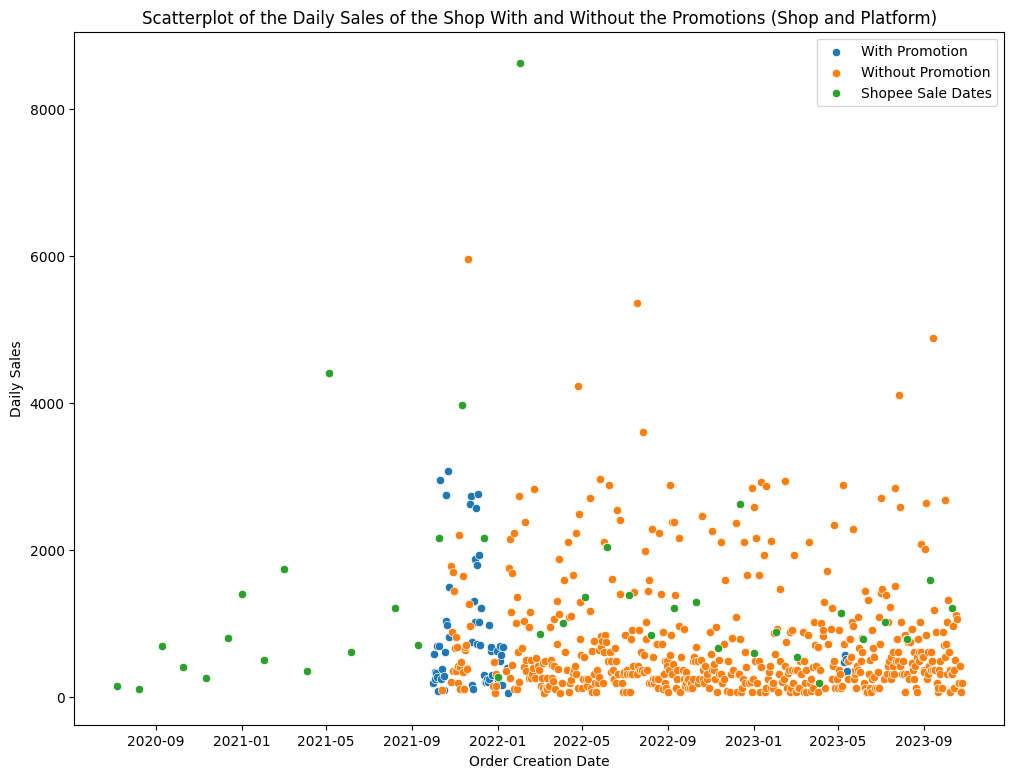

In [235]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=with_promotion, x='Order Creation Date', y='Daily Sales', label='With Promotion')
sns.scatterplot(data=wo_promotion, x='Order Creation Date', y='Daily Sales', label='Without Promotion')
sns.scatterplot(data=shopee_sale, x='Order Creation Date', y='Daily Sales', label='Shopee Sale Dates')
plt.legend()
plt.title('Scatterplot of the Daily Sales of the Shop With and Without the Promotions (Shop and Platform)')
plt.show()

In [236]:
#Do another Mann Whitney U Test.
sales_with_promo = np.array(with_promotion['Daily Sales'])
sales_without_promo = np.array(wo_promotion['Daily Sales'])

stat, p = mannwhitneyu(sales_with_promo, sales_without_promo, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=19582.500, p=0.141


Based on data and the Mann Whitney U Test for the sales of the days with promotions, the sales promotions has is statistically significant (Statistics 19582.5 and p-value =0.141) meaning the sales of the products in the shop does not statistically increase when a promotion or marketing was made for the products. The scatterplot also helps us visualize the spread of the sales in terms of the promotion or sale or non-sale, promotion date it falls on.


I also want to check for the Shopee Payday sale dates and for significant holidays in the Philippines if they have an effect in the sales of the store so that I would have a deeper understanding of the seasonality of the data so that it would give a better accuracy for doing forecasting but I do not remember the payday sale dates starting from 2020 although it's usually at the 2nd and 4th week of the month, sometime the date changes a bit so it's hard create a generalized qualification for the payday sale dates. Also, I still have so many more analysis to do that I will skip on it for now. I will maybe make a small analysis project later on just for that specific thing and the forecasting stuff later on.

**In Summary for the Sales Seasonality and Trend** - The promotions from the Platform Specific Sale dates aave a significant effect of increasing the sales for the products while store promotions does not statistically increase sales.

This will be added in the consideration for strategizing the marketing of the soap.

## **Price Elasticity of Demand Machine Learning Model**

I will now create a Machine Learning model that will analyze how sensitive are the customers to changing prices of the soap with regards to the demand that they want.

For this, I will isolate the Produt Name, Deal Price, Quantity and Product Subtotal for the analysis.

I will use Price Elasticiy Demand for the analysis which measures the change in demand of the product in relation to price changes.

In [180]:
import statsmodels.api as sm

ml_data = df_completed_orders[['Product Name', 'Deal Price', 'Quantity', 'Product Subtotal']]

ml_data.head()

Product Name  Deal Price  Quantity  Product Subtotal
0  Bayabas (Mild Antiseptic Bath Soap)          35        15               525
1      Acapulco (Antifungal Bath Soap)          35        20               700
2      Acapulco (Antifungal Bath Soap)          35        40              1400
3  Bayabas (Mild Antiseptic Bath Soap)          35        40              1400
4   Citronella Antibacterial Bath Soap          35       100              3500

In [181]:
grouped_data = ml_data.groupby('Product Name').agg({'Deal Price': 'mean', 'Quantity': 'sum'}).reset_index()

#Transform the needed column into log to help linearize their exponential relationship.
grouped_data['log_price'] = np.log(grouped_data['Deal Price'])
grouped_data['log_quantity'] = np.log(grouped_data['Quantity'])

X = sm.add_constant(grouped_data['log_price'])
y = grouped_data['log_quantity']
model = sm.OLS(y, X).fit()

In [182]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_quantity   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     33.77
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           4.52e-05
Time:                        04:32:37   Log-Likelihood:                -31.050
No. Observations:                  16   AIC:                             66.10
Df Residuals:                      14   BIC:                             67.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3009      1.655      8.038      0.000       9.752      16.850
log_price     -1.7795      0.306     -5.811      0.000      -2.436      -1.123
==============================================================================
Omnibus:                        6.680   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                3.697
Skew:                          -1.064   Prob(JB):                        0.157
Kurtosis:                       4.008   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

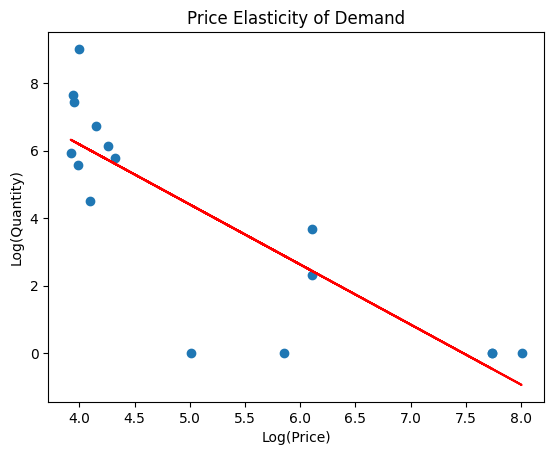

In [183]:
plt.scatter(grouped_data['log_price'], grouped_data['log_quantity'])
plt.plot(grouped_data['log_price'], model.predict(), color='red')
plt.xlabel('Log(Price)')
plt.ylabel('Log(Quantity)')
plt.title('Price Elasticity of Demand')
plt.show()

According to Price Elasticity Demand, the value of price elasticity can be interpreted as follows:

> If elasticity < -1, the product is price elastic, meaning customers are very responsive to price changes.


> If elasticity is between -1 and 0, the product is price inelastic, meaning customers are not very responsive to price changes.

> If elasticity = -1, it is unitary elastic, meaning total revenue remains constant with price changes.

Since there are a lot of metrics for the test. I will jsut focus on the p values and the log_price since these two are the most important parts of the analysis. The p-value has a very low value which is less than 0.0001, means that there is a significant relationship between the price and the demand of the product. The coefficient for the log transformed price (elasticity) is < -1, I can conclude that the price of the products is elastic to demand meaning the customers are quite sensitive to changes in the product's price. So this states that for every 1% decrease in price, there will be a 1.78 increase in demand for the products.

Also, the R-Square of 0.707 means that 70.7% of the variability in the quantity sold can be explained by the model.

The graph shows the relationship of increasing the price with the demand of the product, shown by the red line and the residuals, shown by blue dots.


## Insights from the Analysis

Given that the sales of the products are affected by the marketing and discounts from promotions and the Price elasticity to demand further strengthens the claim, I will now re-evaluate my marketing strategy for the soap. I will also analyze on how to do branding so that we will not be very dependent on the competition for lowering prices. Although I might add that the soaps are the best selling soap for their specific kind, specially Acapulco soap which is number one in sales for all acapulco soaps in the platform and there are other soaps there that are way cheaper compared to us. Will somewhat show that the quality of the product is quaranteed.

### I will now be analyzing the All orders excel file. I will just be doing some analysis on it since most of the analysis that I want for the orders have been done. Let's start.

First I'll check the characteristics of the dataset.

In [184]:
#I will load the dataset again so it's easier to see the data and I will not scroll up just to check.

df_all_orders.head()

Order ID Order Status Cancel reason Return / Refund Status  \
0  230802HKE2P86A    Completed           NaN                    NaN   
1  230802JDW33VKV    Completed           NaN                    NaN   
2  230802K0Q3B7D7    Completed           NaN                    NaN   
3  230802KNREKF17    Completed           NaN                    NaN   
4  230802KS0CYVXS    Completed           NaN                    NaN   

   Tracking Number*             Shipping Option Shipment Method  \
0      7.868695e+11  Standard Local-J&T Express          pickup   
1      7.868695e+11  Standard Local-J&T Express          pickup   
2      7.868695e+11  Standard Local-J&T Express          pickup   
3      7.868695e+11  Standard Local-J&T Express          pickup   
4      7.868695e+11  Standard Local-J&T Express          pickup   

  Estimated Ship Out Date         Ship Time Order Creation Date  \
0        2023-08-10 00:13  2023-08-03 11:08    2023-08-02 00:03   
1        2023-08-10 08:06  2023-08-03 11:08    2023-08-02 07:56   
2        2023-08-10 13:43  2023-08-03 11:08    2023-08-02 13:33   
3        2023-08-10 20:00  2023-08-03 11:08    2023-08-02 19:50   
4        2023-08-10 20:50  2023-08-03 11:08    2023-08-02 20:48   

    Order Paid Time  Parent SKU Reference No.  \
0  2023-08-02 00:13                       NaN   
1  2023-08-02 08:06                       NaN   
2  2023-08-02 13:43                       NaN   
3  2023-08-02 20:00                       NaN   
4  2023-08-02 20:50                       NaN   

                         Product Name  SKU Reference No. Variation Name  \
0     Acapulco (Antifungal Bath Soap)                NaN            NaN   
1     Acapulco (Antifungal Bath Soap)                NaN            NaN   
2     Acapulco (Antifungal Bath Soap)                NaN            NaN   
3     Acapulco (Antifungal Bath Soap)                NaN            NaN   
4  Citronella Antibacterial Bath Soap                NaN            NaN   

   Original Price  Deal Price  Quantity  Product Subtotal  \
0              60          60         2               120   
1              60          60         1                60   
2              60          60         1                60   
3              60          60         2               120   
4              60          60         2               120   

   Total Discount(PHP)  Price Discount(from Seller)(PHP)  Shopee Rebate(PHP)  \
0                    0                                 0                   0   
1                    0                                 0                   0   
2                    0                                 0                   0   
3                    0                                 0                   0   
4                    0                                 0                   0   

   SKU Total Weight  Number of Items in Order  Order Total Weight  \
0              0.36                         2                0.36   
1              0.18                         1                0.18   
2              0.18                         1                0.18   
3              0.36                         2                0.36   
4              0.36                         2                0.36   

   Seller Voucher(PHP)  Seller Absorbed Coin Cashback  Shopee Voucher(PHP)  \
0                    0                              0                    0   
1                    0                              0                    0   
2                    0                              0                    0   
3                    0                              0                    0   
4                    0                              0                    0   

  Bundle Deals Indicator(Y/N)  Shopee Bundle Discount(PHP)  \
0                           N                            0   
1                           N                            0   
2                           N                            0   
3                           N                     

In [185]:
df_all_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order ID                             3342 non-null   object 
 1   Order Status                         3342 non-null   object 
 2   Cancel reason                        347 non-null    object 
 3   Return / Refund Status               8 non-null      object 
 4   Tracking Number*                     3036 non-null   float64
 5   Shipping Option                      3342 non-null   object 
 6   Shipment Method                      3139 non-null   object 
 7   Estimated Ship Out Date              3128 non-null   object 
 8   Ship Time                            3029 non-null   object 
 9   Order Creation Date                  3342 non-null   object 
 10  Order Paid Time                      3342 non-null   object 
 11  Parent SKU Reference No.      

In [186]:
df_all_orders.shape

(3342, 49)

In [187]:
df_all_orders['Order Status'].unique()

array(['Completed', 'Cancelled', 'Shipping', 'To ship'], dtype=object)

In [188]:
df_all_orders['Return / Refund Status'].unique()

array([nan, 'Request Approved', 'Request Cancelled'], dtype=object)

In [189]:
 df_all_orders['Order Status'].value_counts()

Completed    2963
Cancelled     347
Shipping       30
To ship         2
Name: Order Status, dtype: int64

In [190]:
df_all_orders['Cancel reason'].value_counts()

Cancelled by buyer. Reason: Need to change delivery address                                                                                         78
Cancelled by buyer. Reason: Others / change of mind                                                                                                 67
Cancelled by buyer. Reason: Others                                                                                                                  46
Cancelled automatically by Shopee's system. Reason: Failed delivery                                                                                 35
Cancelled by buyer. Reason: Need to modify order                                                                                                    35
Cancelled automatically by Shopee's system. Reason: Payment not received                                                                            20
Cancelled by buyer. Reason: Need to input / change voucher code                               

Based on the descriptions of the datasets. There are also a lot of cancelled orders in the data. I will not focus on the shipping and to ship orders since they are still in transit. Based on the shape of the data, there are about 3342 rows of data and 347 of them are cancelled so there are around 10% of the orders are cancelled which is quite significant. So I will focus on those cancelled orders in this part of the Analysis.

In [191]:
status_counts = df_all_orders['Order Status'].value_counts()


status_percentage = df_all_orders['Order Status'].value_counts(normalize=True) * 100

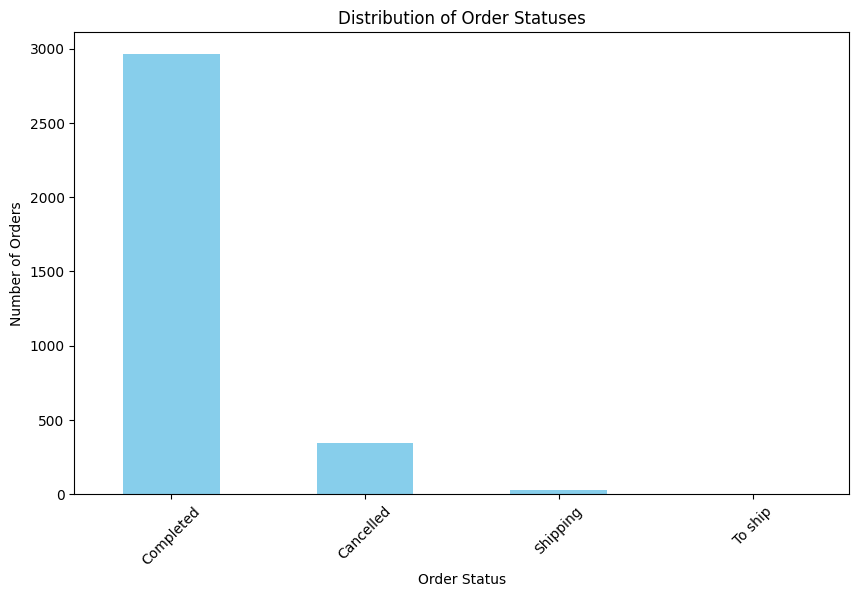

In [192]:
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

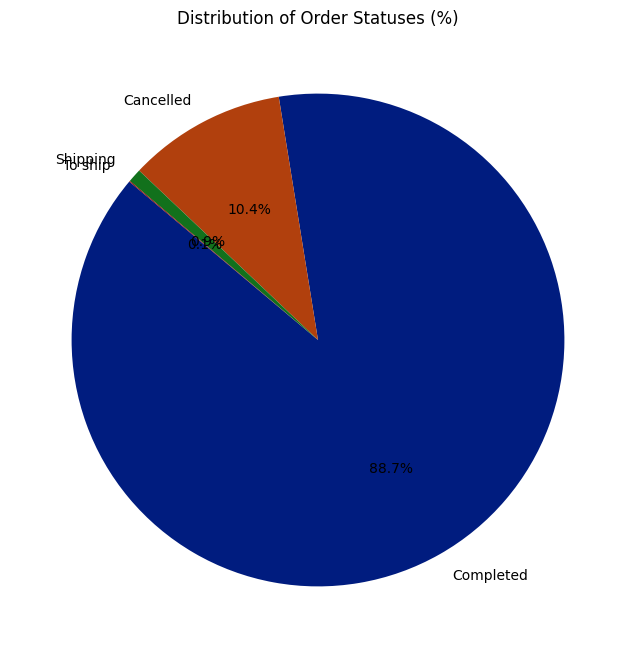

In [193]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_percentage, labels=status_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('dark'))
plt.title('Distribution of Order Statuses (%)')
plt.show()

This shows that 10% of the total order are being cancelled due to different reasons.

In [194]:
# Resample the data to get daily counts of each order status
daily_status_counts = df_all_orders.groupby(['Order Creation Date', 'Order Status']).size().unstack().fillna(0)
daily_status_counts.columns
daily_status_counts.index = pd.to_datetime(daily_status_counts.index)


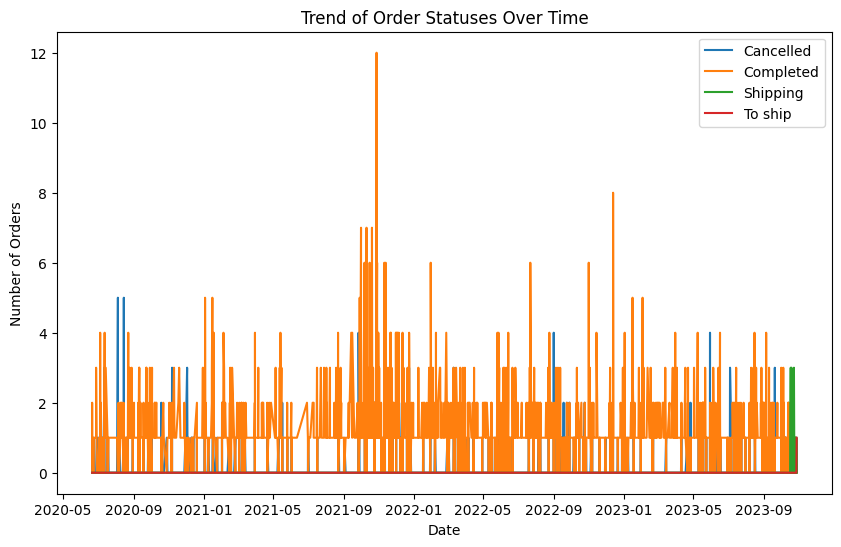

In [195]:
# Plot the trend of each order status over time
plt.figure(figsize=(10, 6))
for status in daily_status_counts.columns:
    plt.plot(daily_status_counts.index, daily_status_counts[status], label=status)
plt.title('Trend of Order Statuses Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

I made some visualizations that show the distribution of the order statuses of my product sales.

To visualize the data, I created a pie chart that captures the distribution of order statuses. It's clear that 'Cancelled' takes a significant slice of the pie, underscoring its impact on the business. The 'Cancelled' segment represents a substantial 10% of the total orders, highlighting that cancellations are a significant aspect of our order processing that warrants our attention and further analysis.

The bar chart, on the other hand, offers a timeline, revealing fluctuations and trends in order statuses over time. Here, the 'Cancelled' orders display noticeable fluctuations, so I will delve deeper into the reason for the cancellations.



In [196]:
df_all_orders['Quantity'].describe()

count    3342.000000
mean        4.843806
std        10.749139
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       100.000000
Name: Quantity, dtype: float64

Here it shows that the mean order is 4.84 and the median is 2 with a standard deviation of 10 which is very high.

In [197]:
cancelled = df_all_orders['Cancel reason'][df_all_orders['Order Status']=='Cancelled'].value_counts(normalize=True) * 100
cancelled.head()


Cancelled by buyer. Reason: Need to change delivery address            22.478386
Cancelled by buyer. Reason: Others / change of mind                    19.308357
Cancelled by buyer. Reason: Others                                     13.256484
Cancelled automatically by Shopee's system. Reason: Failed delivery    10.086455
Cancelled by buyer. Reason: Need to modify order                       10.086455
Name: Cancel reason, dtype: float64

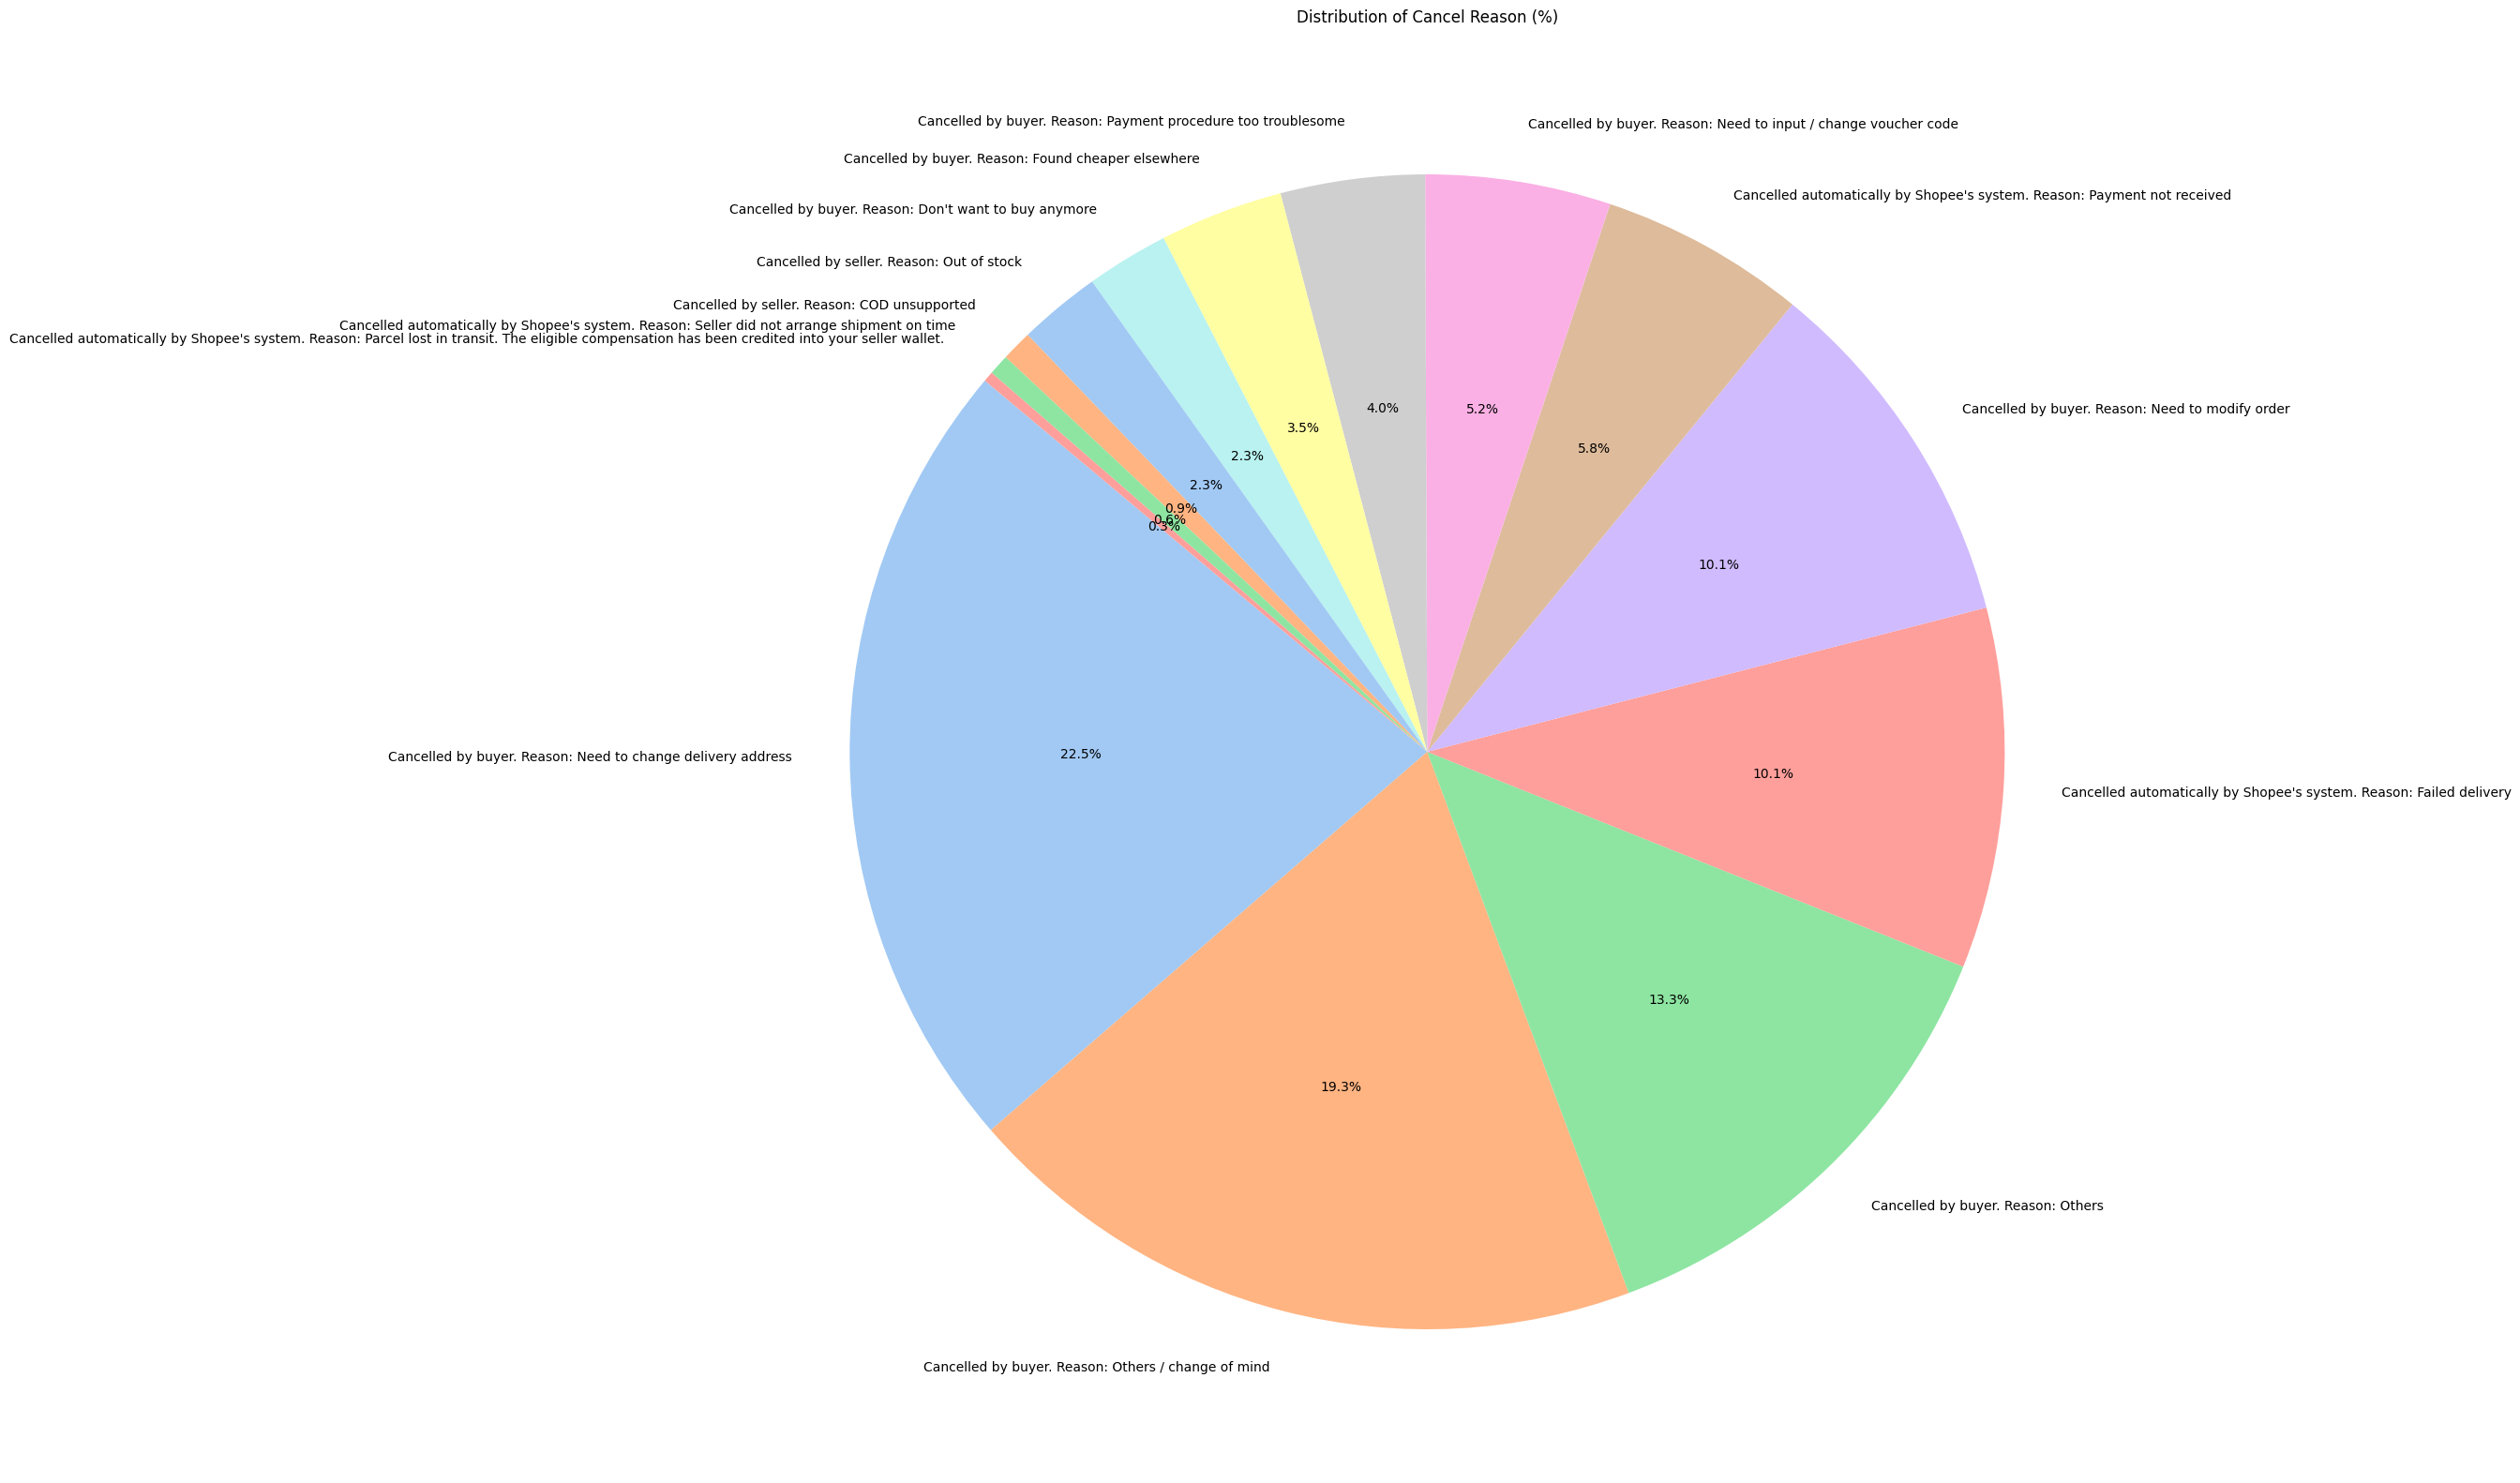

In [198]:
plt.figure(figsize=(20, 20))
plt.pie(cancelled, labels=cancelled.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cancel Reason (%)')
plt.show()

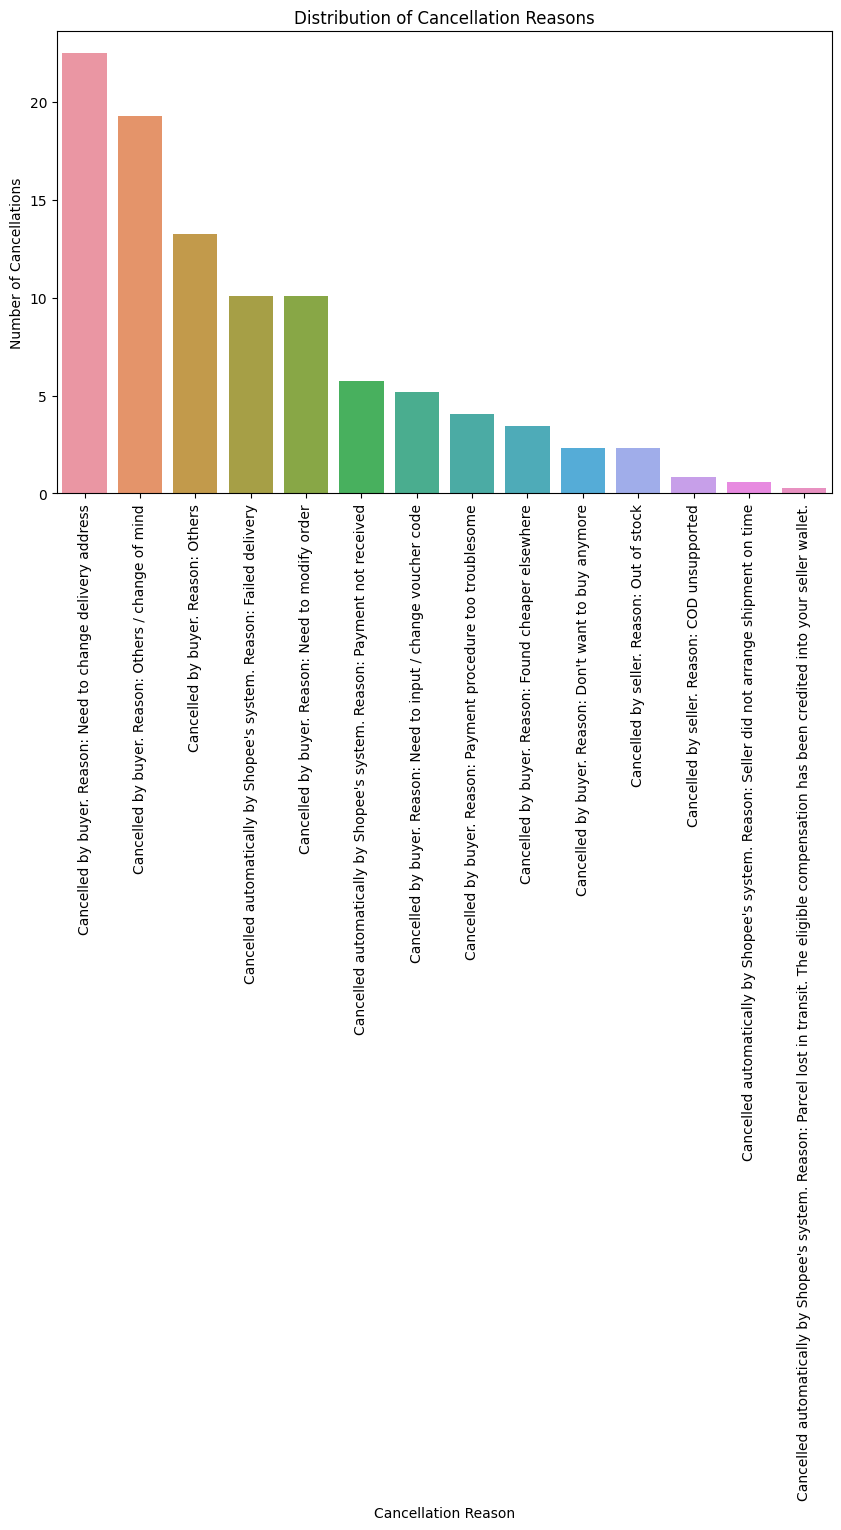

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cancelled.index, y=cancelled.values)
plt.xticks(rotation=90)
plt.title('Distribution of Cancellation Reasons')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')
plt.show()

In [200]:
#order completion time

df_completed_orders['Order Creation Date']=pd.to_datetime(df_completed_orders['Order Creation Date'])
df_completed_orders['Order Complete Time']=pd.to_datetime(df_completed_orders['Order Complete Time'])
completion_date= df_completed_orders['Order Complete Time'] - df_completed_orders['Order Creation Date']

completion_date.mean()

Timedelta('7 days 06:49:00.952380952')

As seen here there are a lot of reasons why the order has been cancelled. The most common one is the need to change the delivery address at 22% and the most problematic of the reasons the delivery has failed, which is a loss for us because the soap that will be returned to us cannot be sold again as it always suffers some dents when it comes back to us. Thinking about the solution for this, I think messaging and following up with the customer is the best that we can do so that they can prepare themselves when the delivery is coming or at least communicate with the courier when they are not at their respective delivery address. The 10% or 34 orders of soap is significant for us since we are a small business and if we quantify that it will be (34 * 2 (median order quantity)) = 68 pieces of soap multiplied by 60 PhP (SRP of the soap), that is 4020 Php worth of sales and plus we are not able to resell it in Shopee anymore since there are cosmetic defects to the product during this time. I think a good idea to do with this is that I will just sell it for a lower price outside the platform so that we can at least recoup our production expense for that soap.

---

Also I wanted to know the average completion time of the delivery of the soap from the creation of the order to the clicking of the customer as 'Order completed in the App or Laptop' and it showed that the average time is 7 Days 6 Hours and 49 Minutes which is quite interesting and a good reference point to add for the FAQ portion of the shop.

## Final Dataset to Analyze

Since I have analyzed the first two datasets and I think I am satisfied with the analyses that I have done even without doing a lot of modeling for the dataset, since I got valuable insights and strategies to employ while observing the data. I will now focus now on the final dataset that I will analyze -  Metrics from Shopee.

In [201]:
df_metric_final.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0  01/10/2021                        40                  96              6   
1  02/10/2021                        21                  50              6   
2  03/10/2021                        40                 131              8   
3  04/10/2021                        24                  65              7   
4  05/10/2021                        42                 127              8   

   Product Bounce Visitors Product Bounce Rate  Search Clicks  Likes  \
0                       21              52.50%              0      0   
1                        8              38.10%              0      0   
2                       18              45.00%              0      0   
3                       10              41.67%              0      1   
4                       20              47.62%              0      1   

   Product Visitors (Add to Cart)  Units (Add to Cart)  \
0                              10                   22   
1                               5                   16   
2                              11                   29   
3                               8                   21   
4                               5                   17   

  Conversion Rate (Add to Cart)  Buyers (Placed Order)  Units (Placed Order)  \
0                        25.00%                      2                     4   
1                        23.81%                      3                    12   
2                        27.50%                      1                     5   
3                        33.33%                      2                     7   
4                        11.90%                      2                     6   

   Items Placed Sales (Placed Order) (PHP)  \
0             0                        291   
1             0                        808   
2             0                        265   
3             0                        439   
4             0                        411   

  Conversion Rate (Product Visit to Placed)  Buyers (Confirmed Order)  \
0                                     5.00%                         2   
1                                    14.29%                         3   
2                                     2.50%                         1   
3                                     8.33%                         2   
4                                     4.76%                         2   

   Units (Confirmed Order)  Items Confirmed Sales (Confirmed Order) (PHP)  \
0                        4                1                           291   
1                       12                2                           808   
2                        5                1                           265   
3                        7                1                           439   
4                        6                4                           411   

  Conversion Rate (Product Visit to Confirmed)  \
0                                        5.00%   
1                                       14.29%   
2                                        2.50%   
3                                        8.33%   
4                                        4.76%   

  Conversion Rate (Placed to Confirmed)_x  Visitors (Site Visit)  \
0                                 100.00%                     41   
1                                 100.00%                     22   
2                                 100.00%                     40   
3                                 100.00%                     26   
4                                 100.00%                     42   

  Conversion Rate (Site Visit to Placed)  \
0                                  4.88%   
1                                 13.64%   
2                                  2.50%   
3                                  7.69%   
4                                  4.76%   

  Sales per Buyer (Confirmed Orders) (PHP)  \
0                                   145.50   
1                              

### Time-Series Analysis of Shop Metrics

In this section, I will again be doing a time-series analysis on some of these metrics. I will be focusing on the 'Product Visitors (Visit)', 'Product Page Views', 'Items Visited', 'Seach Clicks', and 'Likes Column' to see how they progress along time. I will do the same procedures that I have done earlier for the sales data.

In [202]:
df_metric_final['Date'] = pd.to_datetime(df_metric_final['Date'])

<ipython-input-202-fb8c818f7cc6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_metric_final['Date'] = pd.to_datetime(df_metric_final['Date'])


In [203]:
time_series_metrics = df_metric_final[['Date', 'Product Visitors (Visit)', 'Product Page Views', 'Items Visited', 'Search Clicks', 'Likes']]
time_series_metrics.head()

Date  Product Visitors (Visit)  Product Page Views  Items Visited  \
0 2021-01-10                        40                  96              6   
1 2021-02-10                        21                  50              6   
2 2021-03-10                        40                 131              8   
3 2021-04-10                        24                  65              7   
4 2021-05-10                        42                 127              8   

   Search Clicks  Likes  
0              0      0  
1              0      0  
2              0      0  
3              0      1  
4              0      1

Text(0.5, 1.0, 'Likes on the Shop Over Time')

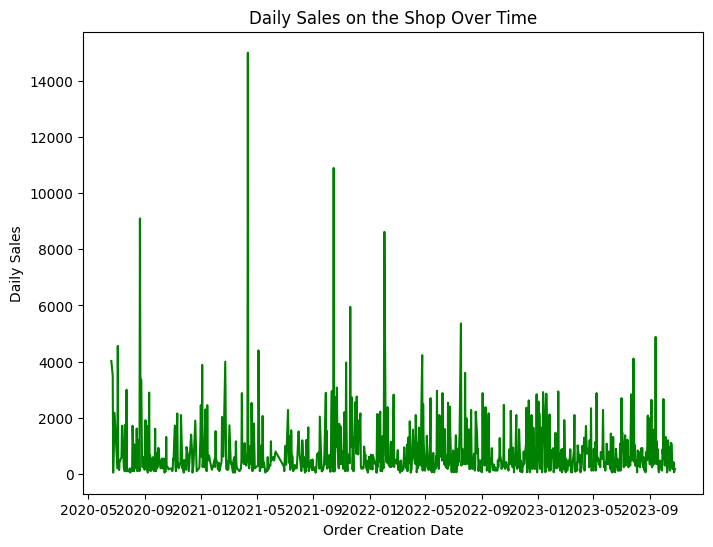

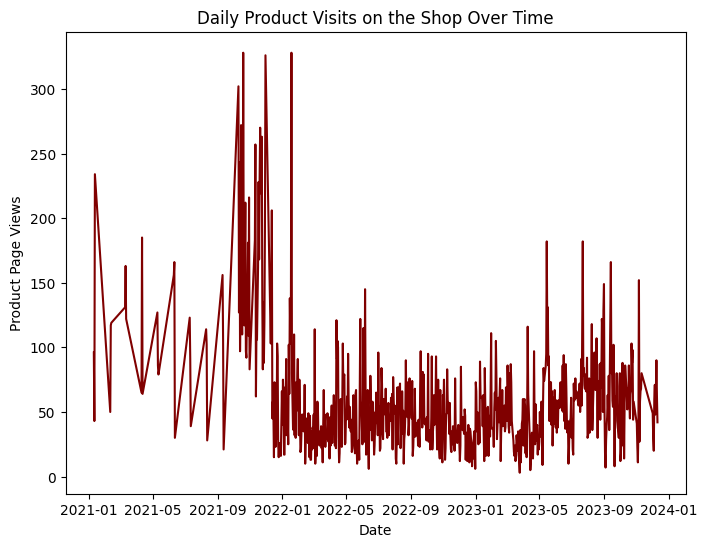

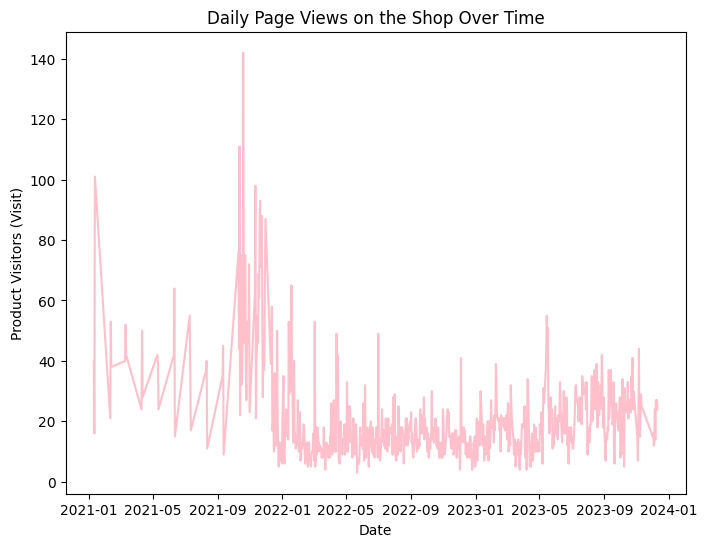

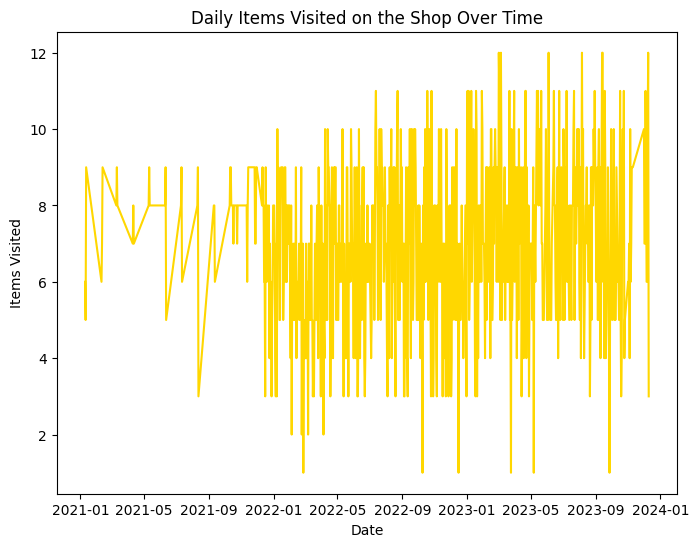

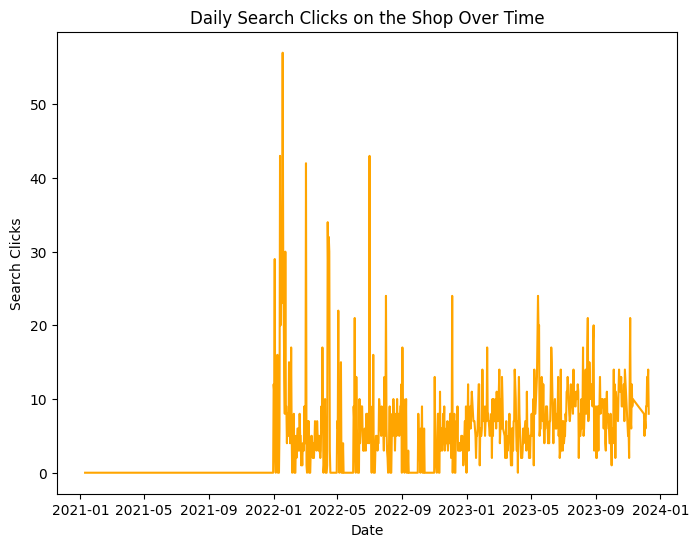

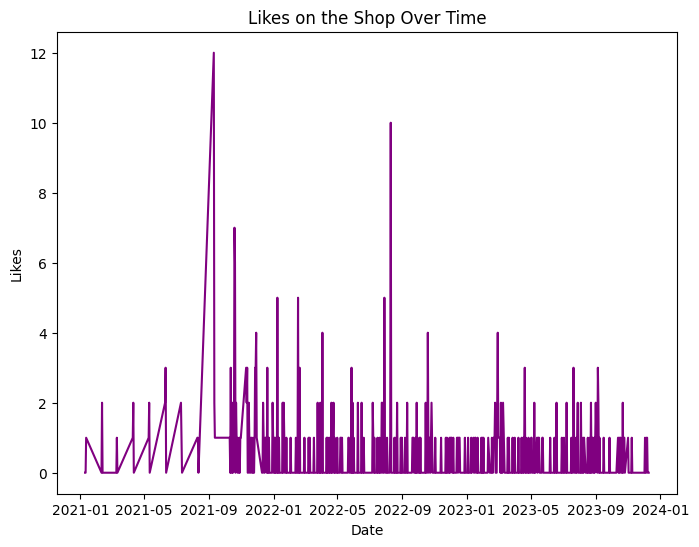

In [204]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Order Creation Date', y='Daily Sales', data=trends, color='green')
plt.title('Daily Sales on the Shop Over Time')


plt.figure(figsize=(8,6))
sns.lineplot(x='Date', y='Product Page Views', data=time_series_metrics, color='maroon')
plt.title('Daily Product Visits on the Shop Over Time')


plt.figure(figsize=(8,6))
sns.lineplot(x='Date', y='Product Visitors (Visit)', data=time_series_metrics, color='pink')
plt.title('Daily Page Views on the Shop Over Time')

plt.figure(figsize=(8,6))
sns.lineplot(x='Date', y='Items Visited', data=time_series_metrics, color='gold')
plt.title('Daily Items Visited on the Shop Over Time')

plt.figure(figsize=(8,6))
sns.lineplot(x='Date', y='Search Clicks', data=time_series_metrics, color='orange')
plt.title('Daily Search Clicks on the Shop Over Time')

plt.figure(figsize=(8,6))
sns.lineplot(x='Date', y='Likes', data=time_series_metrics, color='purple')
plt.title('Likes on the Shop Over Time')


Based on this graphs, the Product Page Views, Product Visitors, and Likes looks like it has decreasing trend and high peaks which might means outliers for the datas and for the Items Visited and Search Clicks it looks like the trend is increasing. I will now do seasonal decomposition to check the datas in a clearer way.


<Figure size 1200x800 with 0 Axes>

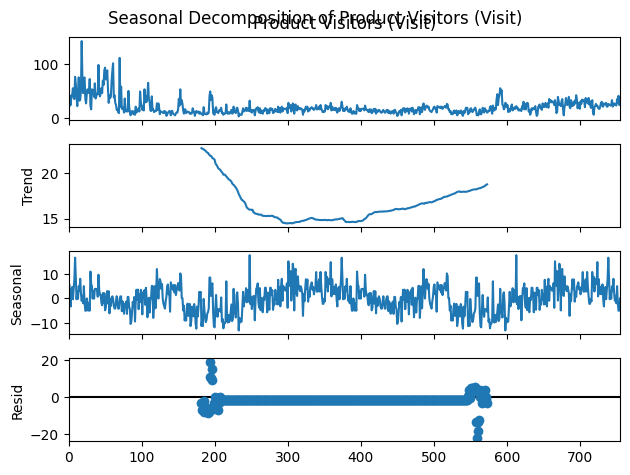

<Figure size 1200x800 with 0 Axes>

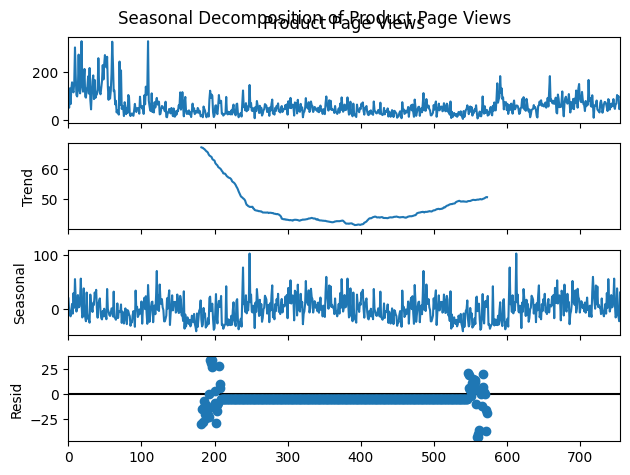

<Figure size 1200x800 with 0 Axes>

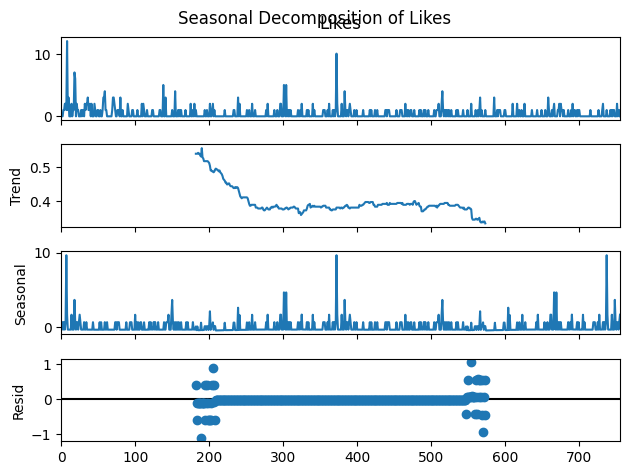

<Figure size 1200x800 with 0 Axes>

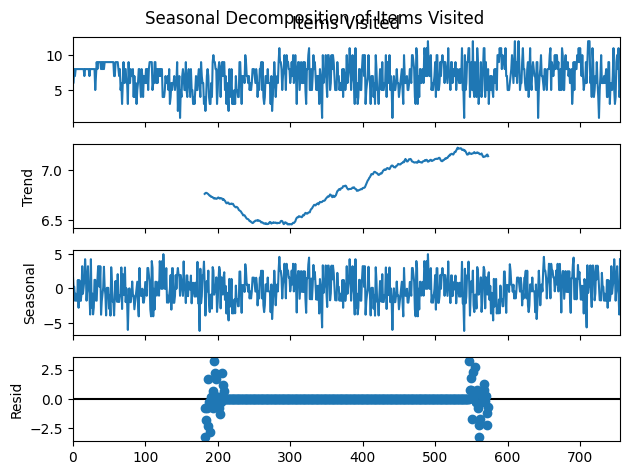

<Figure size 1200x800 with 0 Axes>

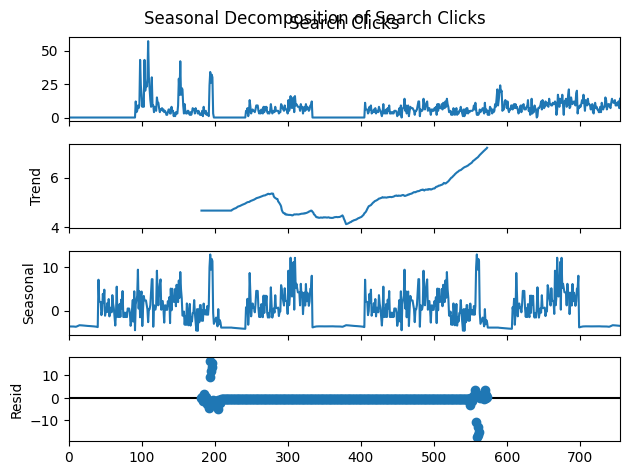

In [205]:
columns_to_decompose = ['Product Visitors (Visit)', 'Product Page Views', 'Likes', 'Items Visited', 'Search Clicks']

for column in columns_to_decompose:
    ts = time_series_metrics[column].interpolate(method='linear')


    result = seasonal_decompose(ts, model='additive', period=365)

    plt.figure(figsize=(12, 8))
    result.plot()
    plt.suptitle(f'Seasonal Decomposition of {column}')
    plt.show()

In [206]:
time_series_metrics.describe()

Product Visitors (Visit)  Product Page Views  Items Visited  \
count                756.000000          756.000000     756.000000   
mean                  20.588624           58.518519       6.953704   
std                   14.890642           44.961039       2.151045   
min                    3.000000            3.000000       1.000000   
25%                   12.000000           31.000000       5.000000   
50%                   17.000000           48.000000       7.000000   
75%                   24.000000           69.000000       9.000000   
max                  142.000000          328.000000      12.000000   

       Search Clicks       Likes  
count     756.000000  756.000000  
mean        5.728836    0.457672  
std         6.206535    0.993786  
min         0.000000    0.000000  
25%         0.000000    0.000000  
50%         5.000000    0.000000  
75%         8.000000    1.000000  
max        57.000000   12.000000

As seen on the seasonal decomposition of the selected columns, Product Visited, Product Page Views and Like are generally decreasing in the trend, there is seasonality and there are some datas where the seasonality and the trend cannot explain. This might be the times where I did ads for the soap. But the money used for the ad was given by shopee from their incubation and missions. So I would not likely use ads yet for the soap if I'm going to use money as the return is not that good compared to doing discounts.

For the search clicks and the items visited the trend is now generally increasing. There is seasonality and there are datas that cannot be accounted for the decomposition still but this is a good thing since the people are starting to look for the product and visit it.

The descriptive statistics were also shown for this part to have a clearer view of the data.

## Feature engineering for the metrics Data

I will be adding new features to the datset by adding new columns computed from the existing column so that I can make detailed analysis for the metrics in this dataset.


In [207]:
df_metric_final.set_index('Date', inplace=True)

In [208]:
df_metric_final['New Visitor Ratio'] = df_metric_final['New Visitors'].replace(',', '', regex=True).astype('int') / df_metric_final['Visitors'].replace(',', '', regex=True).astype('int')
df_metric_final['Existing Visitor Ratio'] = df_metric_final['Existing Visitors'].replace(',', '', regex=True).astype('int') / df_metric_final['Visitors'].replace(',', '', regex=True).astype('int')

<Figure size 1000x500 with 0 Axes>

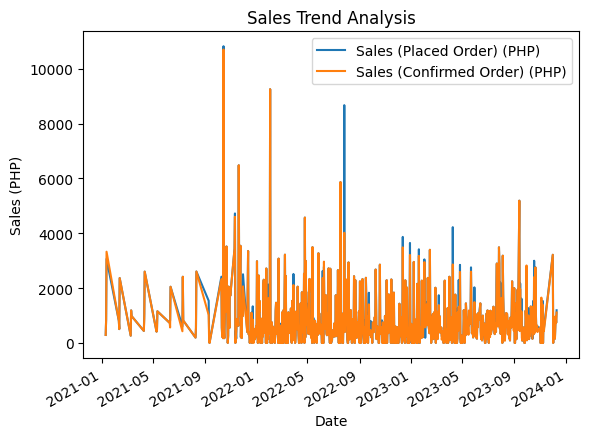

In [209]:
# Sales and Conversion Analysis
df_metric_final[['Sales (Placed Order) (PHP)', 'Sales (Confirmed Order) (PHP)']] = df_metric_final[['Sales (Placed Order) (PHP)', 'Sales (Confirmed Order) (PHP)']].replace(',','',regex=True).astype('int')
plt.figure(figsize=(10, 5))
df_metric_final[['Sales (Placed Order) (PHP)', 'Sales (Confirmed Order) (PHP)']].plot(title='Sales Trend Analysis')
plt.ylabel('Sales (PHP)')
plt.show()

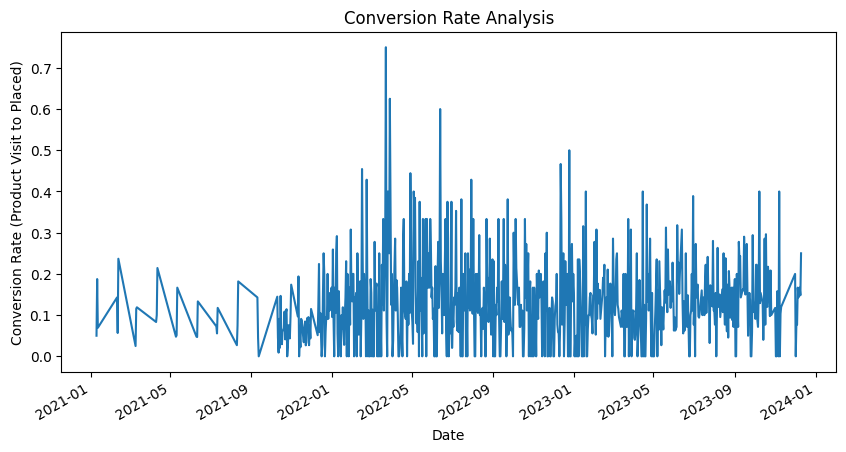

In [210]:
# Convert percentage columns to float
percentage_columns = ['Conversion Rate (Product Visit to Placed)', 'Conversion Rate (Product Visit to Confirmed)', 'Conversion Rate (Site Visit to Confirmed)']
df_metric_final[percentage_columns] = df_metric_final[percentage_columns].replace('%','',regex=True).astype('float') / 100


plt.figure(figsize=(10, 5))
df_metric_final['Conversion Rate (Product Visit to Placed)'].plot(title='Conversion Rate Analysis')
plt.ylabel('Conversion Rate (Product Visit to Placed)')
plt.show()

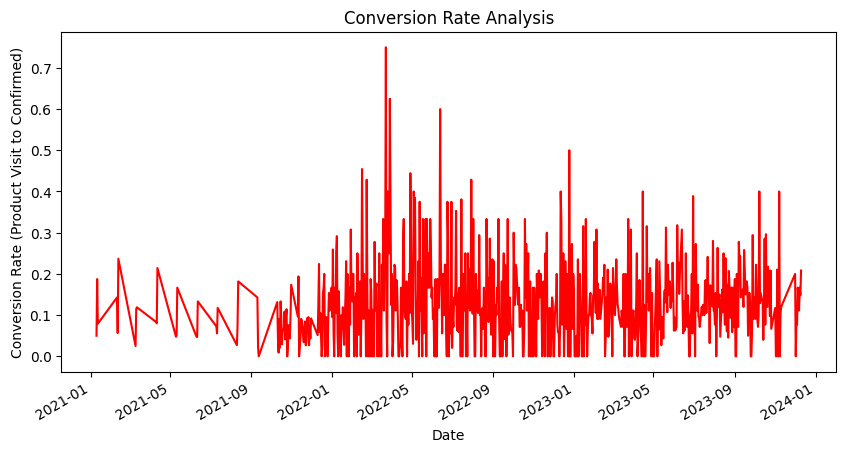

In [211]:
plt.figure(figsize=(10, 5))
df_metric_final['Conversion Rate (Product Visit to Confirmed)'].plot(title='Conversion Rate Analysis', color='red')
plt.ylabel('Conversion Rate (Product Visit to Confirmed)')
plt.show()

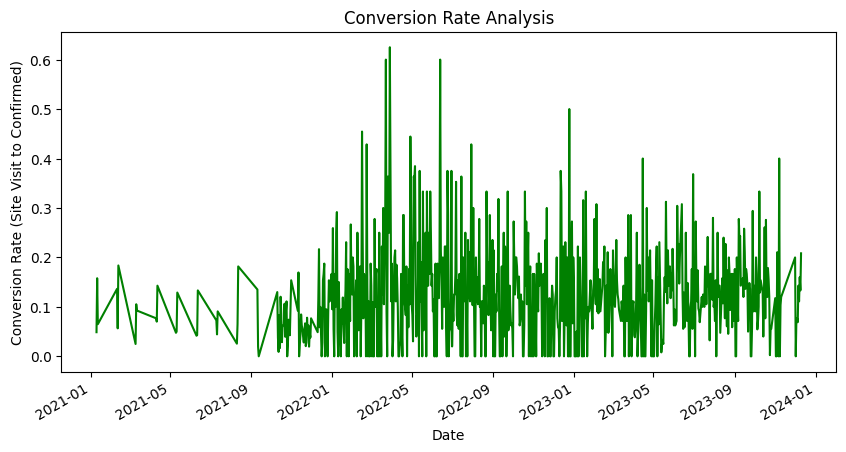

In [212]:
plt.figure(figsize=(10, 5))
df_metric_final['Conversion Rate (Site Visit to Confirmed)'].plot(title='Conversion Rate Analysis', color='green')
plt.ylabel('Conversion Rate (Site Visit to Confirmed)')
plt.show()

This graph shows that the placed orders and the confirmed orders are generally the same in values which means that it's very rare for customers to change their mind during placing an order. Although majority of the mind-change for the order comes after the order was confirmed. Meaning there are factors that affect the buyer after the time they placed and confirmed the order and after the confirmation (As we see from the order cancelation reasons graph). As of now, I will not make an analysis for why is this so but I will keep this in mind for now. I just want to see what is going on with the ordering process.

<Figure size 1000x500 with 0 Axes>

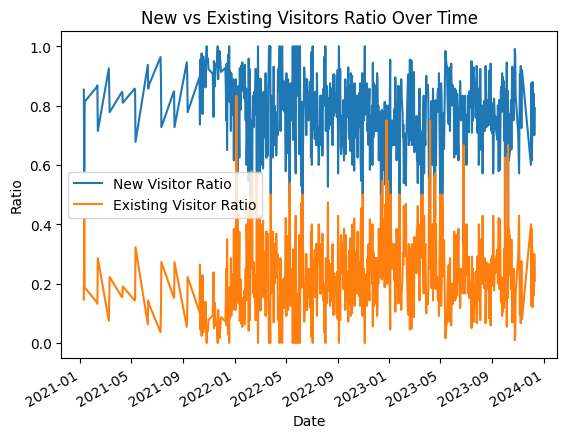

In [213]:
plt.figure(figsize=(10, 5))
df_metric_final[['New Visitor Ratio', 'Existing Visitor Ratio']].plot(title='New vs Existing Visitors Ratio Over Time')
plt.ylabel('Ratio')
plt.legend()
plt.show()

In [214]:
new_visitors_engagement = df_metric_final[df_metric_final['New Visitor Ratio'] > 0.5][['Likes', 'Search Clicks', 'New Followers']].mean()
existing_visitors_engagement = df_metric_final[df_metric_final['Existing Visitor Ratio'] > 0.5][['Likes', 'Search Clicks', 'New Followers']].mean()

print("Engagement for New Visitors:")
print(new_visitors_engagement)
print("\nEngagement for Existing Visitors:")
print(existing_visitors_engagement)

Engagement for New Visitors:
Likes            0.471233
Search Clicks    5.839726
New Followers    0.563014
dtype: float64

Engagement for Existing Visitors:
Likes            0.133333
Search Clicks    1.733333
New Followers    0.000000
dtype: float64


This analysis focused on the visitors of the site. I tried to find in a simple analysis what the characteristics of the vistors are (new and existing) based on the dataset. The first graph shows the proportion of visitors from the store on a day to day basis, and as seen in the graph, there are more new visitors in on the shop everyday compared to existing visitors. For the output, here are the observations:

> Engagement for New Visitors:
* Likes: On average, new visitors like content 0.471233 times.
* Search Clicks: New visitors tend to have an average of 5.839726 search clicks.
* New Followers: An average of 0.563014 new visitors become followers.

> Engagement for Existing Visitors:
* Likes: Existing visitors like content less frequently, with an average of 0.133333 likes.
* Search Clicks: Existing visitors have an average of 1.733333 search clicks, which is significantly less than new visitors.
* New Followers: No existing visitors became followers, as indicated by an average of 0.000000. This makes sense since existing visitors would have likely already decided on whether to follow when they first visited the page.

The data suggests that new visitors tend to be more engaged than existing visitors, as seen from the higher average likes, search clicks, and new followers. This could imply several things, such as marketing campaigns attracting engaged new users, or the need for more content or features to retain and re-engage existing users.

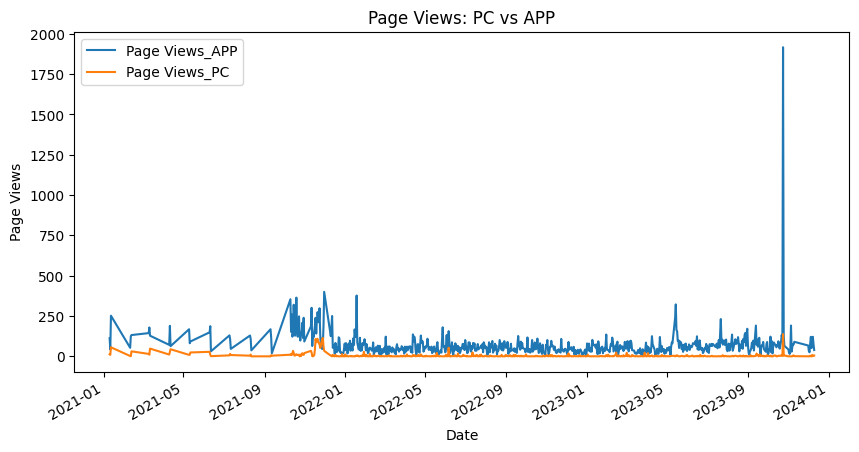

In [215]:
plt.figure(figsize=(10, 5))
df_metric_final['Page Views_APP'].replace(',','', regex=True).astype('int').plot()
df_metric_final['Page Views_PC'].replace(',','', regex=True).astype('int').plot()
plt.title('Page Views: PC vs APP')
plt.legend()
plt.ylabel('Page Views')
plt.show()

This shows the page views of the platforms for the shop. As seen here, the app generally has a higher page views compared to the PC. This is probably due to the fact that online shoppers tend to use their Phones to buy stuff. This thing is even true for me. The fluctuations tends to be steady with occational spikes indicating outliers. Specially at the last part of the data. Which I can explain because that's when I started to do marketing in Facebook and using Affiliate Marketing. I do not want to do seasonal decomposition again as the sales data has given me enough insights on what to do with the business. Although this data is very helpful with reinforcing the decision even without the seasonal decomposition analysis.

<Figure size 1000x500 with 0 Axes>

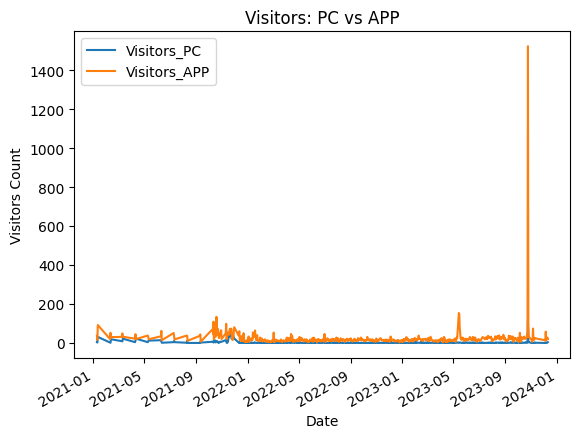

In [216]:
plt.figure(figsize=(10, 5))
df_metric_final[['Visitors_PC', 'Visitors_APP']].replace(',', '', regex=True).astype('int').plot(title='Visitors: PC vs APP')
plt.ylabel('Visitors Count')
plt.show()

This graph shows the comparison on the Shop Visitors coming from PC and the APP. The explanation for it is just the same as that of the Page Views.

In [217]:
df_metric_final['Avg. Time Spent'] = pd.to_timedelta(df_metric_final['Avg. Time Spent']).dt.total_seconds()
df_metric_final['Avg. Time Spent_PC'] = pd.to_timedelta(df_metric_final['Avg. Time Spent_PC']).dt.total_seconds()
df_metric_final['Avg. Time Spent_APP'] = pd.to_timedelta(df_metric_final['Avg. Time Spent_APP']).dt.total_seconds()

In [218]:
df_metric_final['Bounce Rate'] = df_metric_final['Bounce Rate'].str.rstrip('%').astype(float)
df_metric_final['Bounce Rate_PC'] = df_metric_final['Bounce Rate_PC'].str.rstrip('%').astype(float)
df_metric_final['Bounce Rate_APP'] = df_metric_final['Bounce Rate_APP'].str.rstrip('%').astype(float)

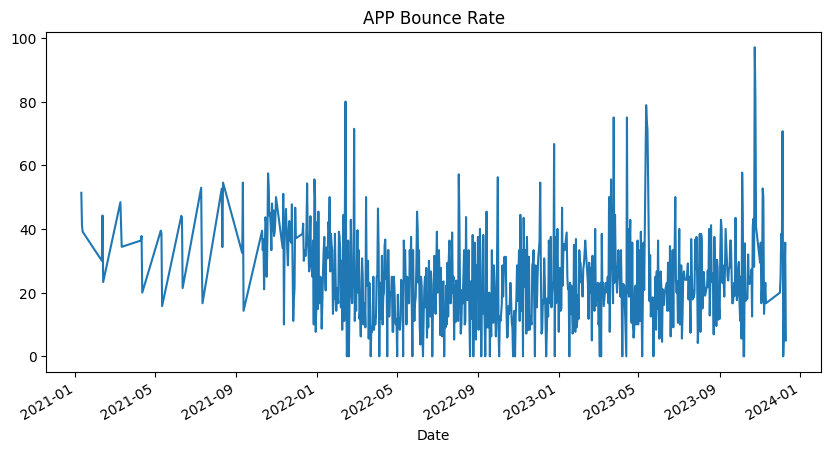

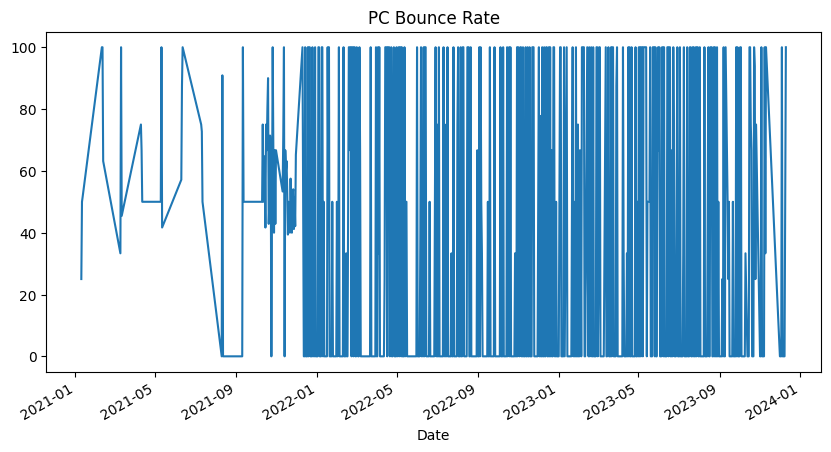

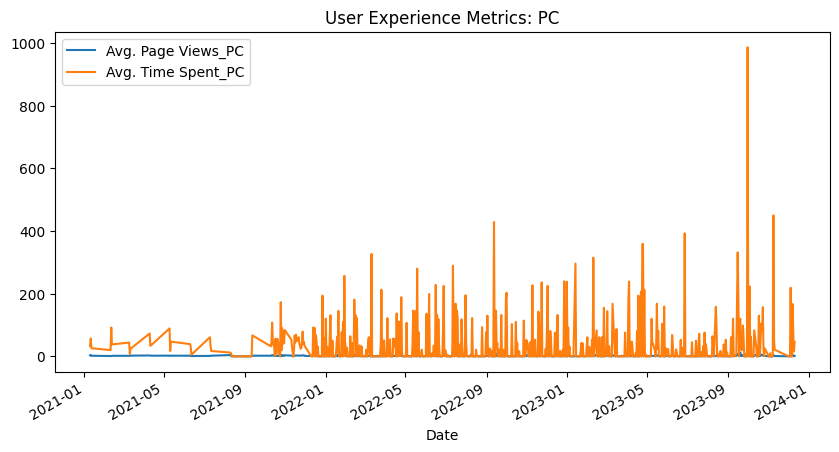

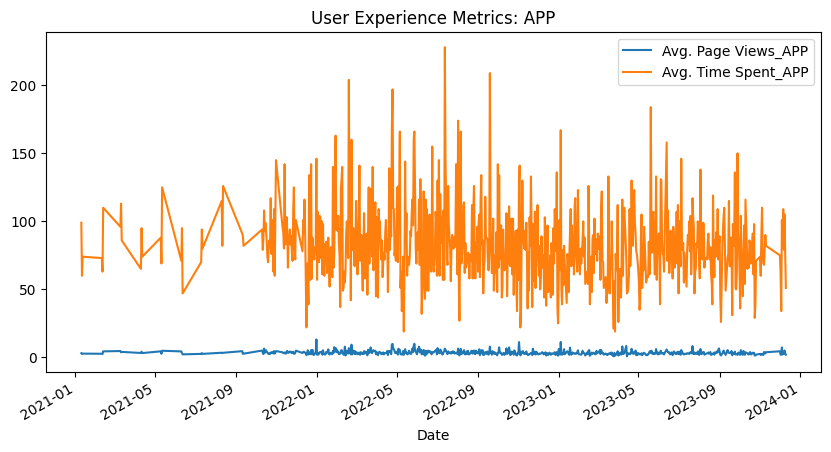

In [219]:
ux_metrics_pc = ['Avg. Page Views_PC', 'Avg. Time Spent_PC']
ux_metrics_app = ['Avg. Page Views_APP', 'Avg. Time Spent_APP']

df_metric_final['Bounce Rate_APP'].plot(title='APP Bounce Rate', figsize=(10,5))
plt.show()
df_metric_final['Bounce Rate_PC'].plot(title='PC Bounce Rate', figsize=(10,5))
plt.show()
df_metric_final[ux_metrics_pc].plot(title='User Experience Metrics: PC', figsize=(10, 5))
plt.show()
df_metric_final[ux_metrics_app].plot(title='User Experience Metrics: APP', figsize=(10, 5))
plt.show()

In this section, I checked the user experience of the customers by feature engineering metrics available to me for a clearer picture.

### Bounce Rate
The bounce rate represents the percentage of visitors who navigate away from the site after viewing only one page. A high bounce rate might suggest that the landing page isn't relevant or compelling to visitors.
 > Based on the data the PC Platform often has a very high bounce rate and often erratic (as seen in the graph, ang pangit tignan lol). This might mean that the PC layout of the shop might not be as appealing to the shop visitors.

 > The bounce rate for the APP platform seems generally lower and more stable than that of the PC. However, there are still noticeable spikes, suggesting occasional issues or anomalies.

 > Based on this I might strategize how to redesign the Pages of the shop to make it look more appealing to the vistors.

 ### User Experience Metrics
 The graphs has two lines:
 * The blue line (Avg. Page Views) shows the average number of page views per day on the specific platform.

 * The orange line (Avg. Time Spent) illustrates the average time users spent on the specific platform each day.

 > As seen on the graphs, the page views appear to fluctuate around a steady range, while average time spent has a similar trend but with occasional spikes.

  > There's a noticeable difference in scale between the APP and PC Average Time Spent. The PC has higher average time spent with pronounced spikes, especially towards the end. This is maybe because it is generally easier to have lower attention span when using a phone than a laptop.

The charts provide a comparative view of user engagement and experience across two platforms: a mobile APP and a personal computer. While both platforms show fluctuating engagement metrics, the PC platform exhibits more extreme variations, especially in bounce rates. I will try my best to improve the user experience of the shop based on the information that I have gleaned from this analysis.

# ***Conclusion and Final Thoughts***

In this extensive analysis of my Shopee Store data for sales and user behavior, I have discovered valuable insights that can significantly influence the strategic direction of the business. Through meticulous (and sometimes trial and error) exploration of order statuses, sales performance, and user engagement metrics, I have identified areas of strength and opportunities for growth.

> The exploration of sales performance highlighted seasonal trends and top-performing product categories, providing a roadmap for inventory management and promotional activities. This data-driven approach enables me to optimize our sales strategy to align with customer demand, market trends, and geographical segmentation.

> The analysis of order statuses revealed a substantial proportion of canceled orders, emphasizing the need for a deeper investigation into customer satisfaction and the order fulfillment process. By understanding the underlying reasons for cancellations, we can develop targeted strategies to enhance the customer experience and minimize lost sales.


> The user behavior analysis of the two platforms (APP and PC) offered insights into how customers interact with my store. The fluctuations in bounce rates and engagement metrics underscore the importance of optimizing the user interface and improving the overall user experience for both platforms, particularly on the PC platform. I will need to learn a bit in UX here
### 😆😅


## ***What I will do and plan in the coming Year?***
* Increase Marketing for Brand Awareness
* Create a consistent Brand Voice for the products and Brand Identity of the Soaps.
* Rebrand so that the Brand Name will stick and we will not be fully dependent on the price.
* Do promotions and coincide them with the Platform Sale periods.
* Check on how to improve Page Layout for PC and APP. If possible to A/B Testing if I learn how to use the developer center for Shopee.
* Improve engagement by answering the message as prompt as possible.
* Increase engagement and awareness of the product by using social media as a funnel to direct traffic to the site.
* Learn and improve the affiliate marketing of the soap.
* Do Facebook Ads that target the Top Provinces for the Soap to increase awareness.

This has been a very fullfilling and fun project that not just helped me learn Data Analytics better. It has also helped me understand what was going on in my soap business and helped me strategize for the coming year. So hitting three birds with one stone.

#**TLDR:**

### This data analysis project focused on a comprehensive overview of my Shopee Store's sales, order status and user engagement, identifying key areas for improvement and opportunities for the Store and improve the sales performance. I've navigated through sales data, uncovering trends and top sellers to better manage stock and plan promotions. There's a bit of a cancellations with orders, so I've tried to find out why and make sure our customers are happier and to build trust and improve customer experience. On the tech side, I've been comparing how people use our store in the App versus the PC version of Shopee, and it's clear we've got some work to do on the computer side of things to improve the overall user engagement and experience. These insights gained lay the groundwork for strategic plans to optimize sales performance, reduce order cancellations, and improve user engagement across platforms.

---
# ---END---